In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [94]:
def bin_smooth(x): # Only works for 1D I think.
    sum = 0
    smoothed_list = []
    for i in range(len(x)):
        sum = sum + x[i]
        if (i%4 == 3) or (i == len(x)-1):
            smoothed_list.append(sum/4)
            sum = 0
    return np.array(smoothed_list)

def graph_quick(fig, ax, spectrum, geiger, D3Scount, label):
    ax[0].plot(spectrum[:,1:500][-1]-spectrum[:,1:500][0])
    ax[0].set_yscale('log')
    ax[0].set_title(f'Spectrum - {label}')
    spectrum_smooth = bin_smooth(spectrum[:,1:500][-1])
    spectrum_smooth_initial = bin_smooth(spectrum[:,1:500][0])
    ax[1].plot(np.arange(0,len(spectrum_smooth))*4, spectrum_smooth-spectrum_smooth_initial)
    ax[1].set_yscale('log')
    ax[1].set_title(f'Spectrum Smoothed - {label}')
    ax[2].hist(geiger[:,1])
    ax[2].set_title(f'Pocket Geiger Counts - {label}')
    ax[3].hist(D3Scount[1:,3])
    ax[3].set_title(f'D3S Counts - {label}')
    
def graph_smooth(fig, ax, spectrum, label):
    spectrum_smooth = bin_smooth(spectrum[:,1:750][-1])
    spectrum_smooth_initial = bin_smooth(spectrum[:,1:750][0])
    length = spectrum.shape[0]
    ax.plot(np.arange(0,len(spectrum_smooth))*4, (spectrum_smooth-spectrum_smooth_initial)*30/length, label=label)
    ax.set_yscale('log')
    
def graph_smooth_unpro(fig, ax, spectrum, label):
    spectrum_smooth = bin_smooth(spectrum[:,1:750][-1])
    spectrum_smooth_initial = bin_smooth(spectrum[:,1:750][0])
    length = spectrum.shape[0]
    ax.plot(np.arange(0,len(spectrum_smooth))*4, (spectrum_smooth-spectrum_smooth_initial), label=label)
    ax.set_yscale('log')

***Background***

In [3]:
# Data Sets
bg_geiger = pd.read_csv('background.csv').to_numpy() # These two will be used for all data sets
bg_D3Scount = pd.read_csv('background_data_2024-04-24_15-09-50.csv').to_numpy()
bg_spectrum = pd.read_csv('Spectrum_background_data_2024-04-24_15-09-50.csv').to_numpy()

In [4]:
# print(bg_spectrum)
# print(bg_spectrum.to_numpy()[:,1:][-1])

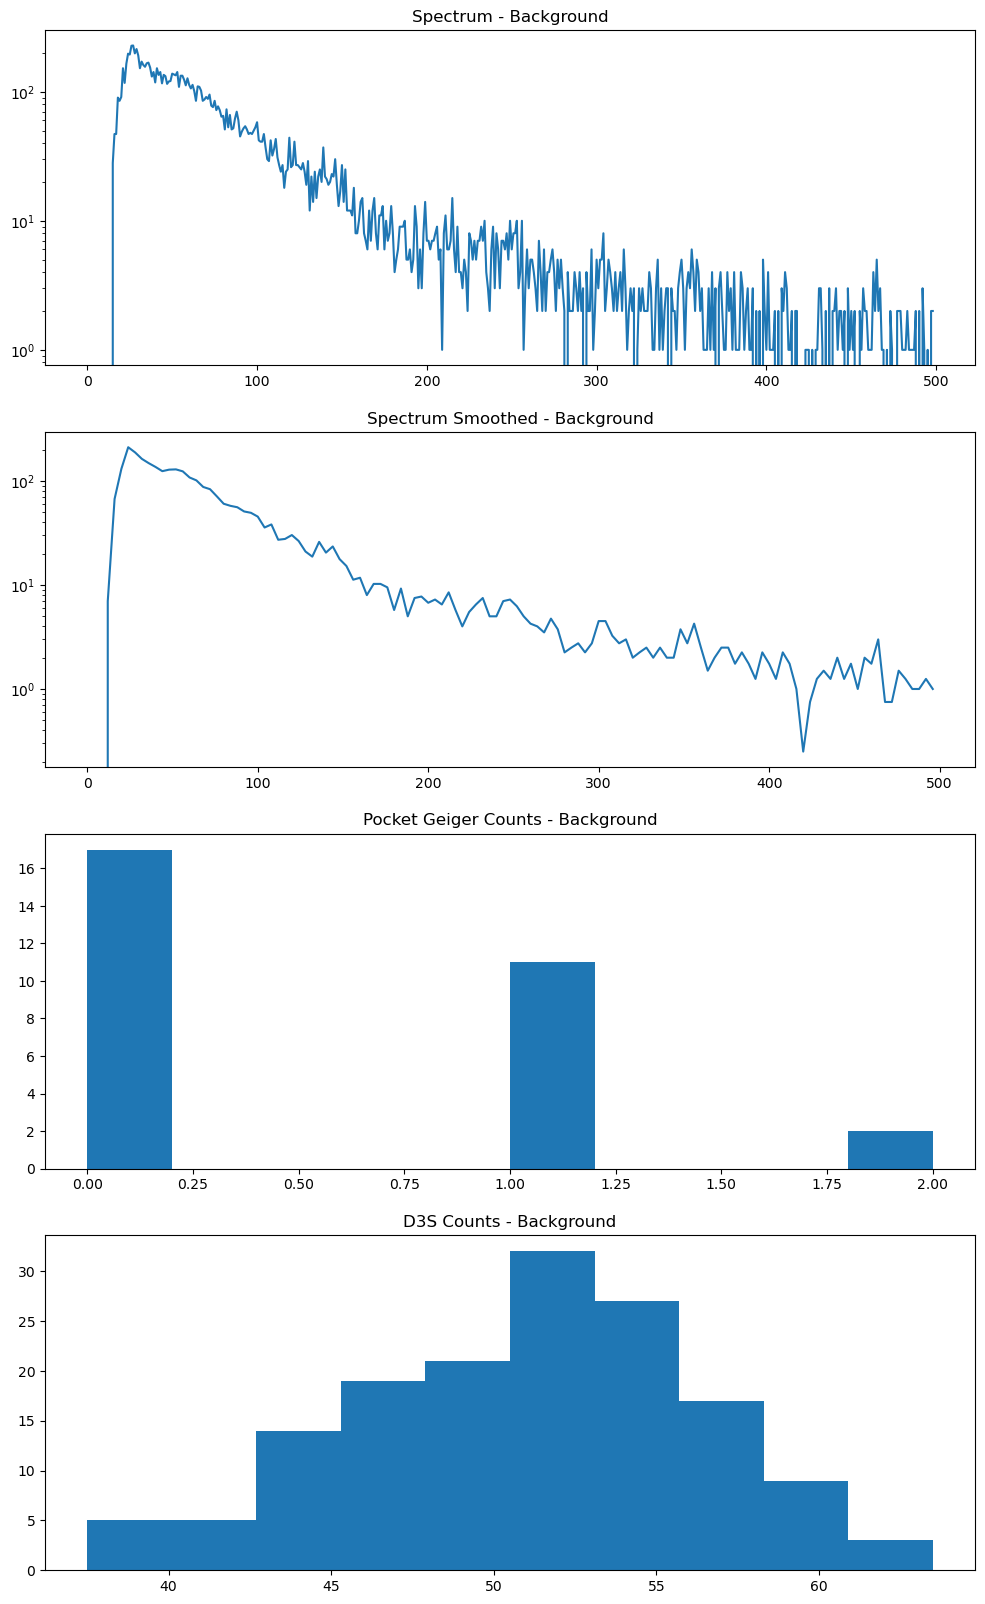

In [5]:
fig1, ax1 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig1, ax1, bg_spectrum, bg_geiger, bg_D3Scount, 'Background')
# ax1.plot(bg_spectrum.to_numpy()[:,1:][-1])
# ax1.set_yscale('log')

***Sample 1 - Known - Fiesta Ware w/ Uraninum***

In [6]:
# Data Sets
FW_NS_spectrum = pd.read_csv('Spectrum_known_uranium_noshield_2024-04-24_15-19-34.csv').to_numpy()
FW_NS_geiger = pd.read_csv('known_uranium_noshield.csv').to_numpy()
FW_NS_D3Scount = pd.read_csv('known_uranium_noshield_2024-04-24_15-19-34.csv').to_numpy()
# print(FW_NS_spectrum[:,1:][-1])
# print(FW_NS_geiger[:,1])
# print(FW_NS_D3Scount[1:,3])
FW_AL_spectrum = pd.read_csv('Spectrum_known_uranium_aluminum_2024-04-24_15-26-58.csv').to_numpy()
FW_AL_geiger = pd.read_csv('known_uranium_aluminum.csv').to_numpy()
FW_AL_D3Scount = pd.read_csv('known_uranium_aluminum_2024-04-24_15-26-58.csv').to_numpy()
FW_W1_spectrum = pd.read_csv('Spectrum_known_uranium_tungsten_2024-04-24_15-33-36.csv').to_numpy()
FW_W1_geiger = pd.read_csv('known_uranium_tungsten.csv').to_numpy()
FW_W1_D3Scount = pd.read_csv('known_uranium_tungsten_2024-04-24_15-33-36.csv').to_numpy()
FW_W2_spectrum = pd.read_csv('Spectrum_known_uranium_tungsten2_2024-04-24_15-39-42.csv').to_numpy()
FW_W2_geiger = pd.read_csv('known_uranium_tungsten2.csv').to_numpy()
FW_W2_D3Scount = pd.read_csv('known_uranium_tungsten2_2024-04-24_15-39-42.csv').to_numpy()

Text(0.5, 1.0, 'D3S Counts - Fiesta Ware, No Shielding')

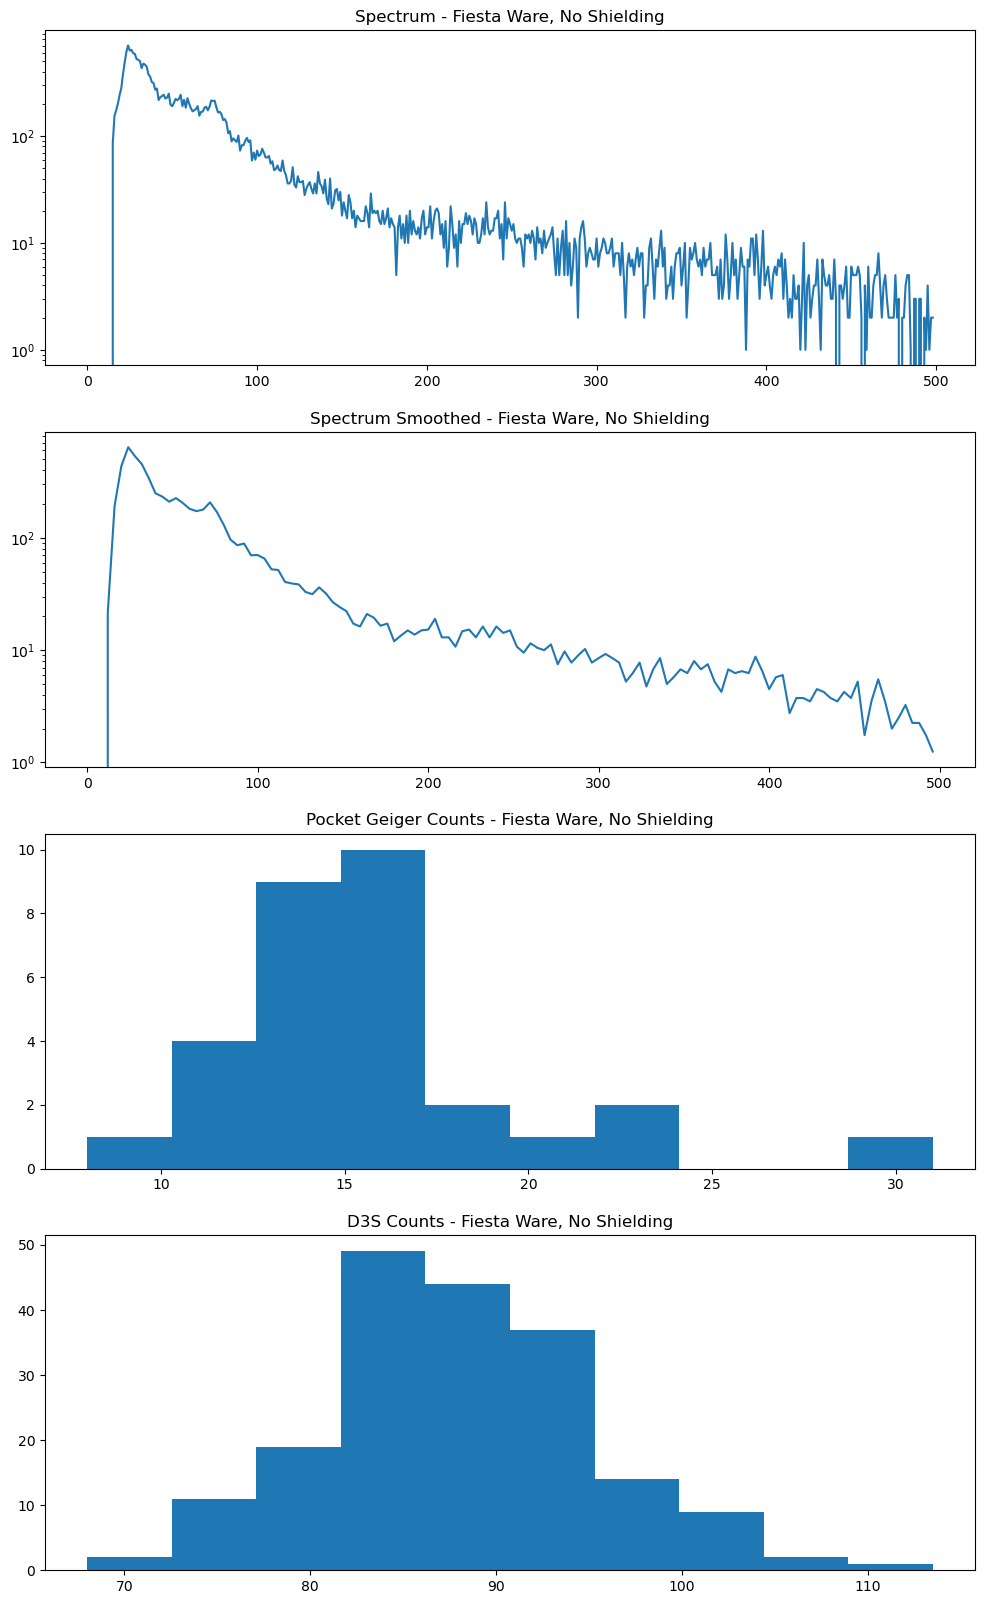

In [7]:
fig2, ax2 = plt.subplots(figsize=(12,20),nrows=4)
ax2[0].plot(FW_NS_spectrum[:,1:500][-1]-FW_NS_spectrum[:,1:500][0])
ax2[0].set_yscale('log')
ax2[0].set_title('Spectrum - Fiesta Ware, No Shielding')
FW_NS_spectrum_smooth = bin_smooth(FW_NS_spectrum[:,1:500][-1])
ax2[1].plot(np.arange(0,len(FW_NS_spectrum_smooth))*4, FW_NS_spectrum_smooth-bin_smooth(FW_NS_spectrum[:,1:500][0]))
ax2[1].set_yscale('log')
ax2[1].set_title('Spectrum Smoothed - Fiesta Ware, No Shielding')
ax2[2].hist(FW_NS_geiger[:,1])
ax2[2].set_title('Pocket Geiger Counts - Fiesta Ware, No Shielding')
ax2[3].hist(FW_NS_D3Scount[1:,3])
ax2[3].set_title('D3S Counts - Fiesta Ware, No Shielding')

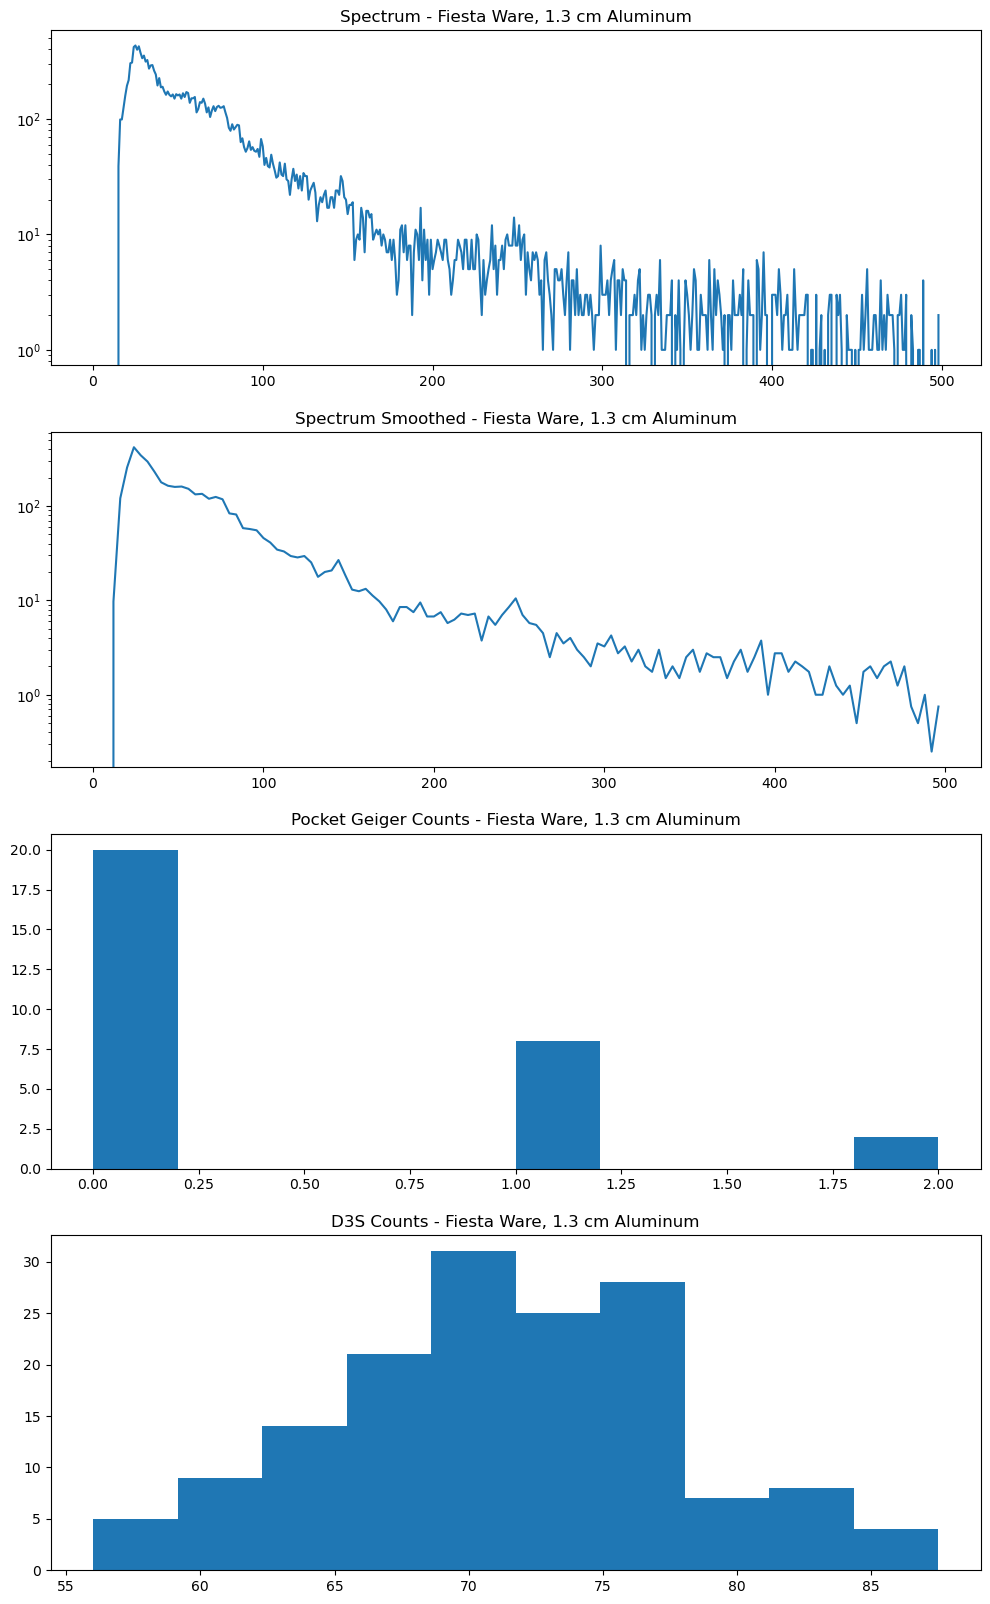

In [8]:
fig3, ax3 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig3, ax3, FW_AL_spectrum, FW_AL_geiger, FW_AL_D3Scount, 'Fiesta Ware, 1.3 cm Aluminum')

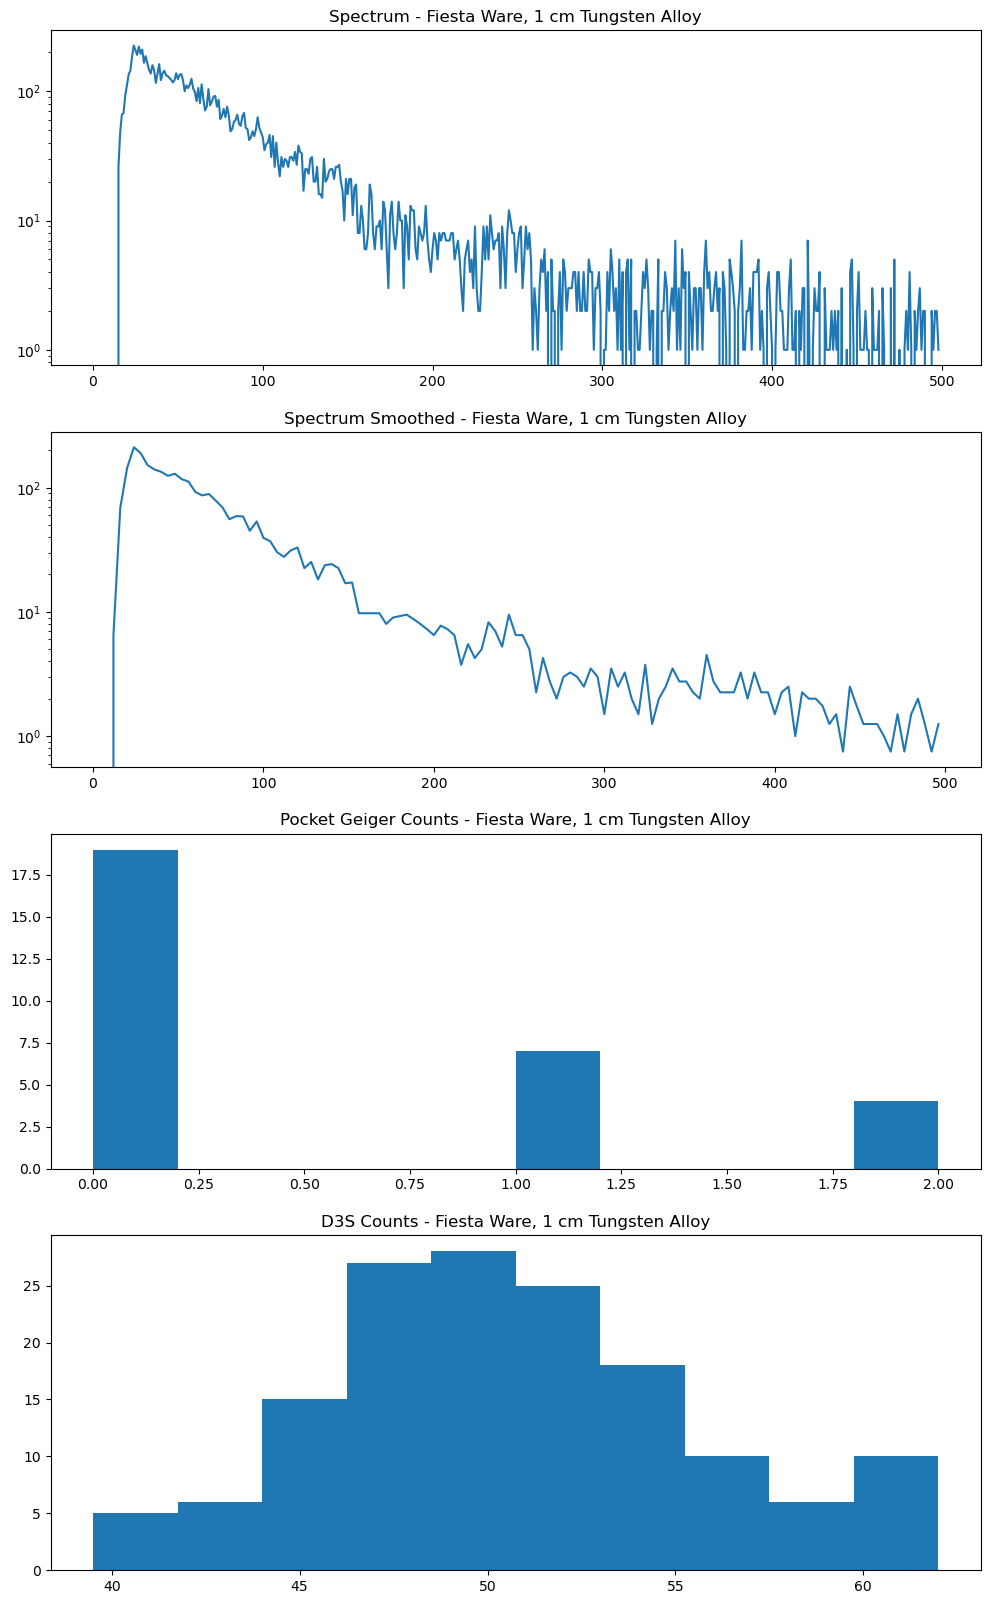

In [9]:
fig4, ax4 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig4, ax4, FW_W1_spectrum, FW_W1_geiger, FW_W1_D3Scount, 'Fiesta Ware, 1 cm Tungsten Alloy')

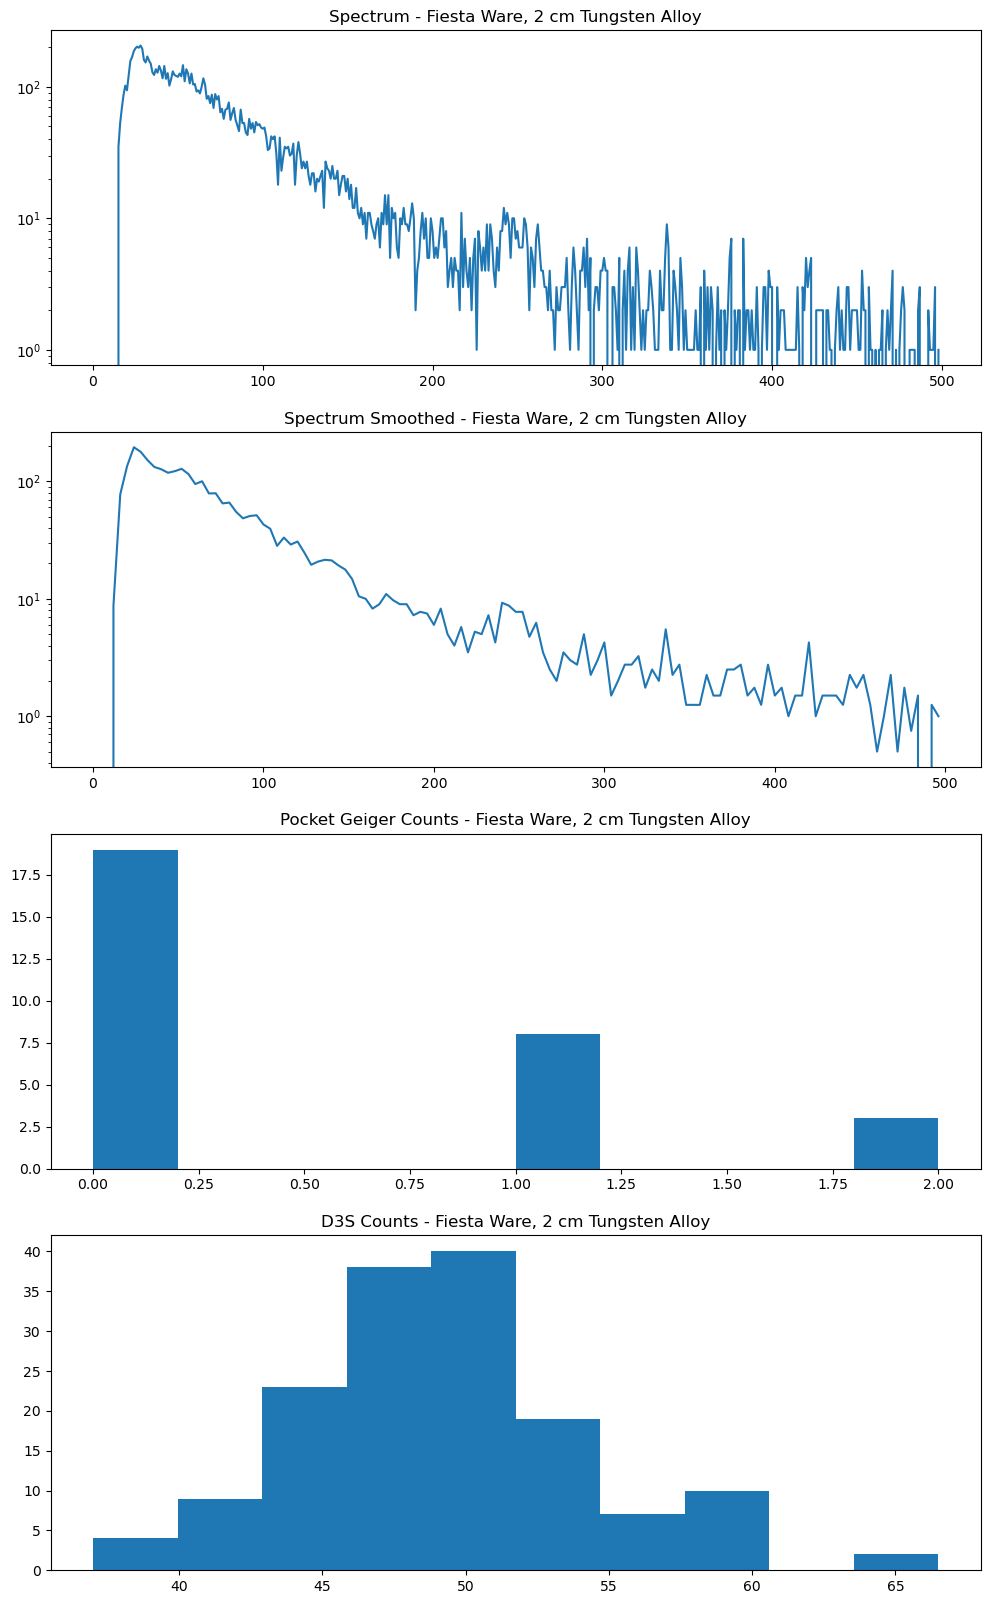

In [10]:
fig5, ax5 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig5, ax5, FW_W2_spectrum, FW_W2_geiger, FW_W2_D3Scount, 'Fiesta Ware, 2 cm Tungsten Alloy')

***Sample 2 - Known - Bottle of Uranium Ore***

In [11]:
OB_NS_spectrum = pd.read_csv("Spectrum_known_orebottle_noshield_2024-04-24_16-22-29.csv").to_numpy()
OB_NS_geiger = pd.read_csv("known_orebottle_noshield.csv").to_numpy()
OB_NS_D3Scount = pd.read_csv("known_orebottle_noshield_2024-04-24_16-22-29.csv").to_numpy()
OB_AL_spectrum = pd.read_csv("Spectrum_known_orebottle_aluminum_2024-04-24_16-28-08.csv").to_numpy()
OB_AL_geiger = pd.read_csv("known_orebottle_aluminum.csv").to_numpy()
OB_AL_D3Scount = pd.read_csv("known_orebottle_aluminum_2024-04-24_16-28-08.csv").to_numpy()
OB_W1_spectrum = pd.read_csv("Spectrum_known_orebottle_tungsten_2024-04-24_16-33-43.csv").to_numpy()
OB_W1_geiger = pd.read_csv("known_orebottle_tungsten.csv").to_numpy()
OB_W1_D3Scount = pd.read_csv("known_orebottle_tungsten_2024-04-24_16-33-43.csv").to_numpy()
OB_W2_spectrum = pd.read_csv("Spectrum_known_orebottle_tungsten2_2024-04-24_16-39-13.csv").to_numpy()
OB_W2_geiger = pd.read_csv("known_orebottle_tungsten2.csv").to_numpy()
OB_W2_D3Scount = pd.read_csv("known_orebottle_tungsten2_2024-04-24_16-39-13.csv").to_numpy()

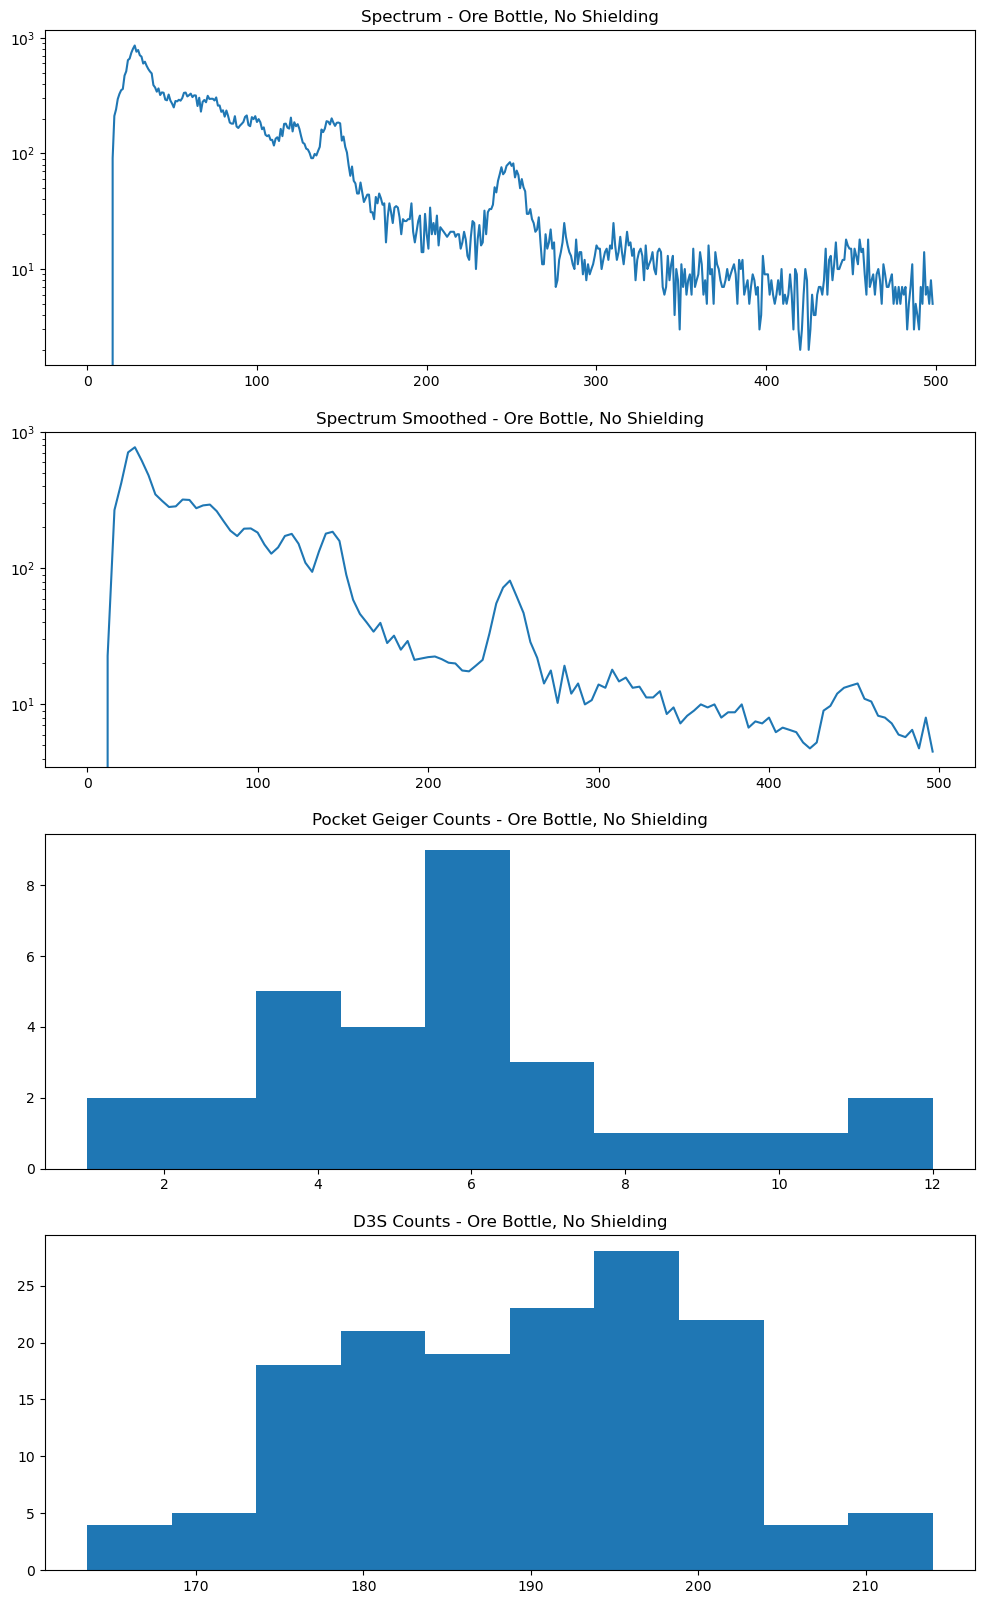

In [12]:
fig6, ax6 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig6, ax6, OB_NS_spectrum, OB_NS_geiger, OB_NS_D3Scount, 'Ore Bottle, No Shielding')

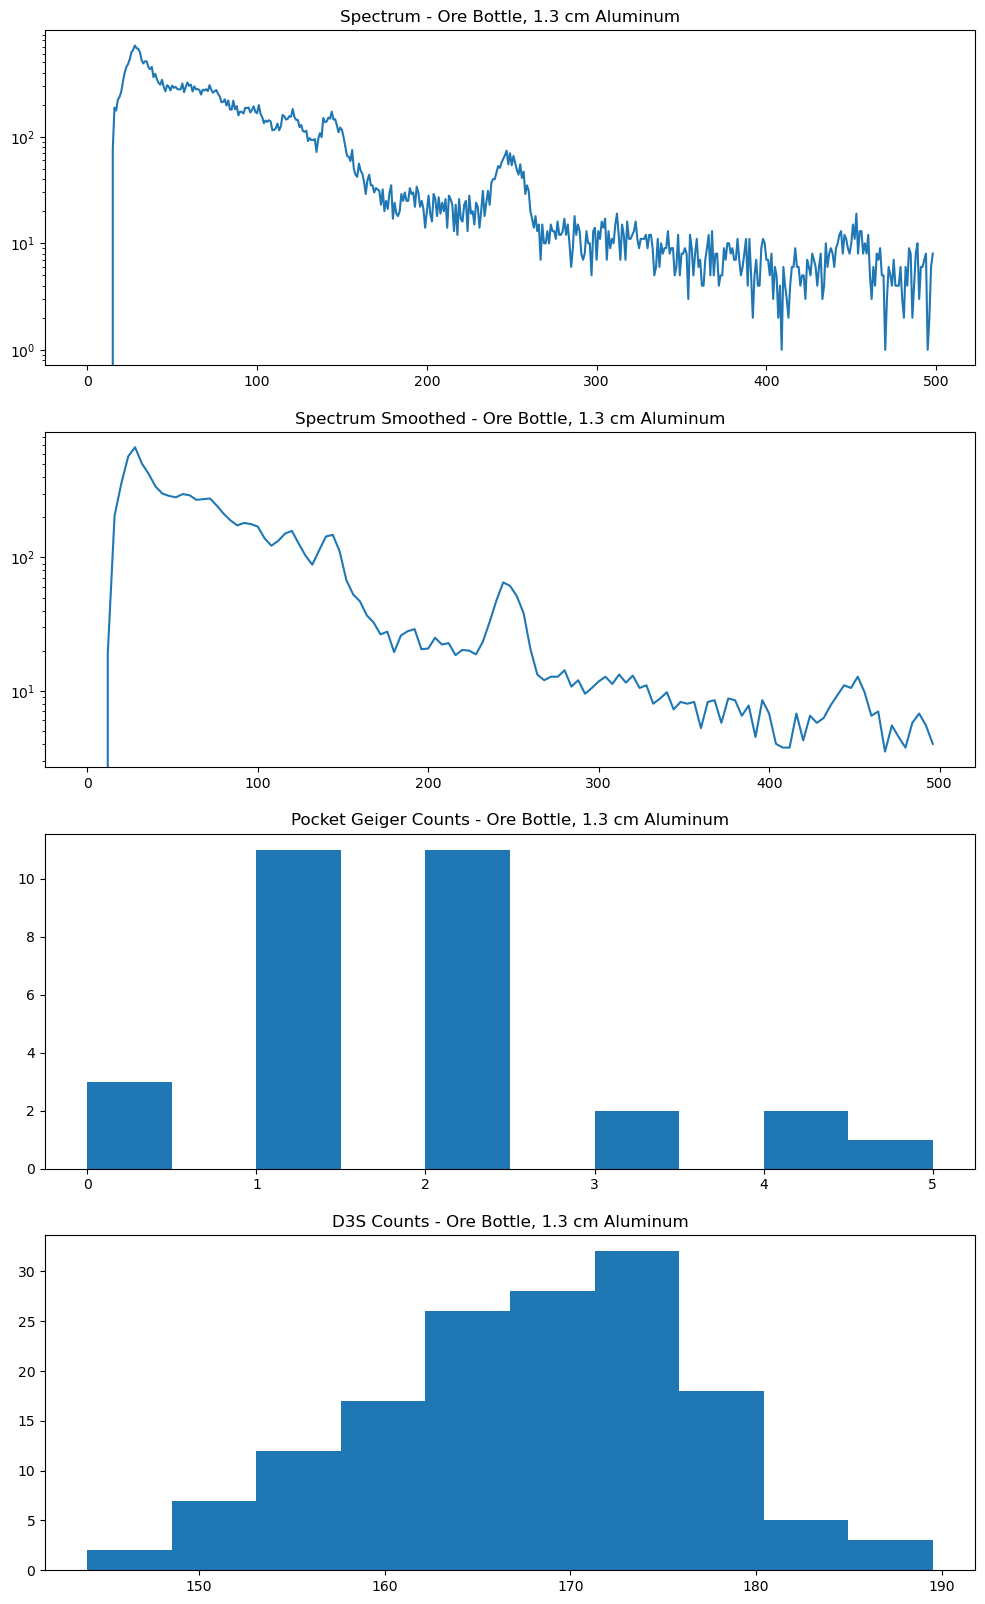

In [13]:
fig7, ax7 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig7, ax7, OB_AL_spectrum, OB_AL_geiger, OB_AL_D3Scount, 'Ore Bottle, 1.3 cm Aluminum')

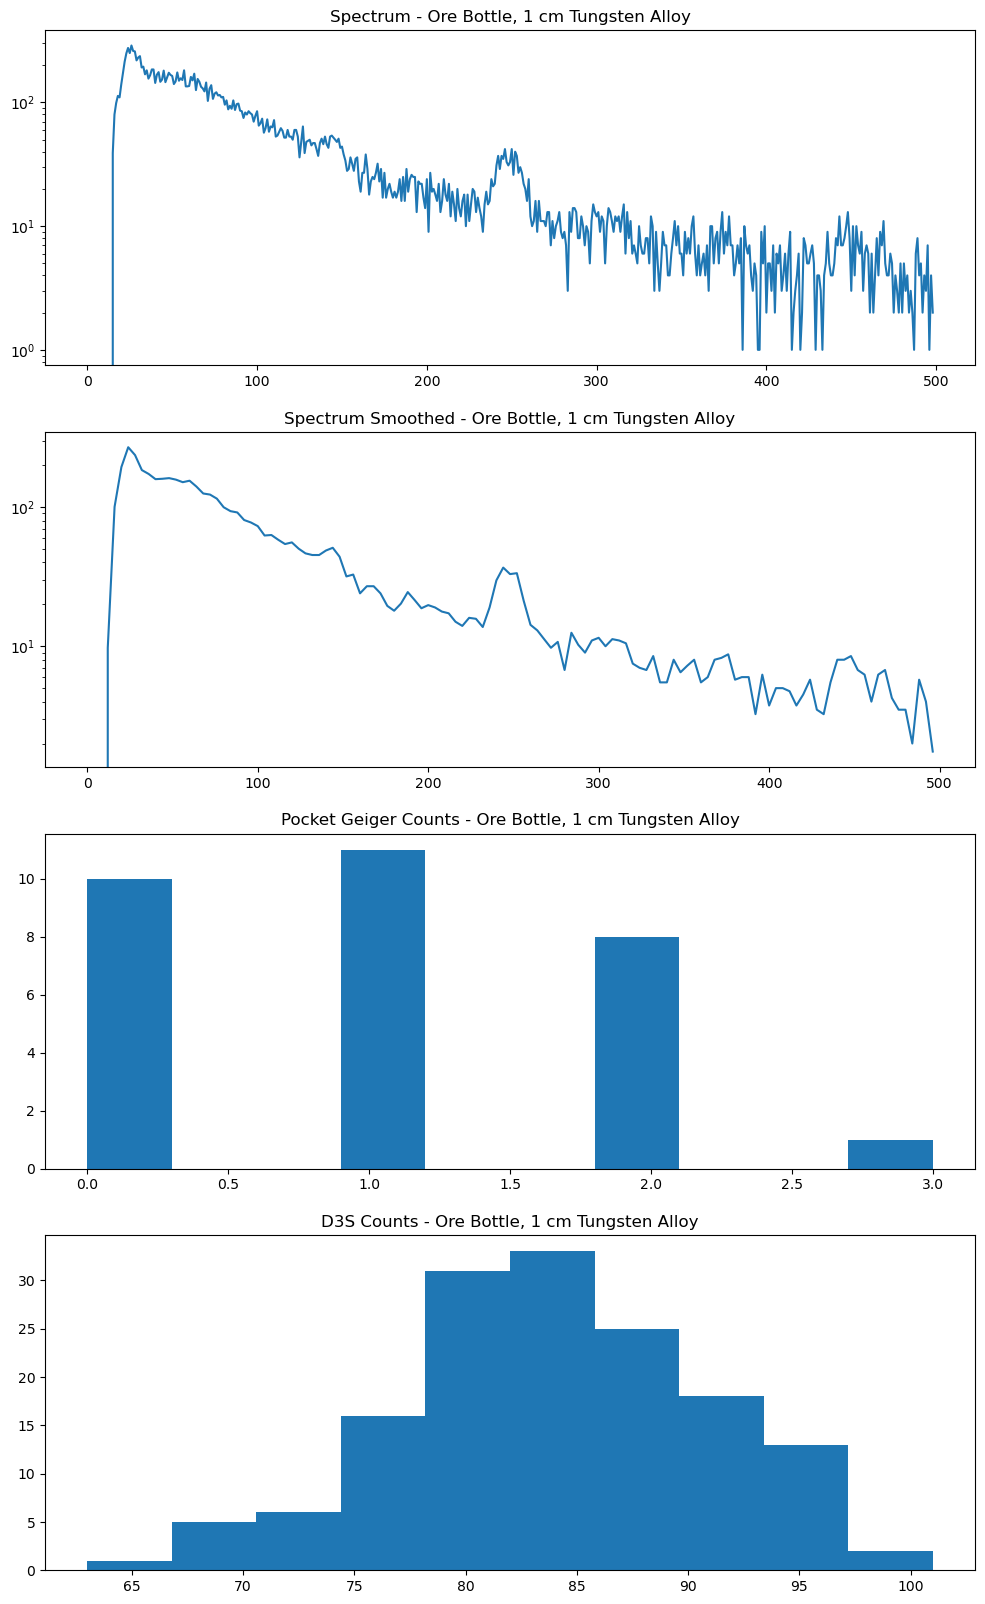

In [14]:
fig8, ax8 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig8, ax8, OB_W1_spectrum, OB_W1_geiger, OB_W1_D3Scount, 'Ore Bottle, 1 cm Tungsten Alloy')

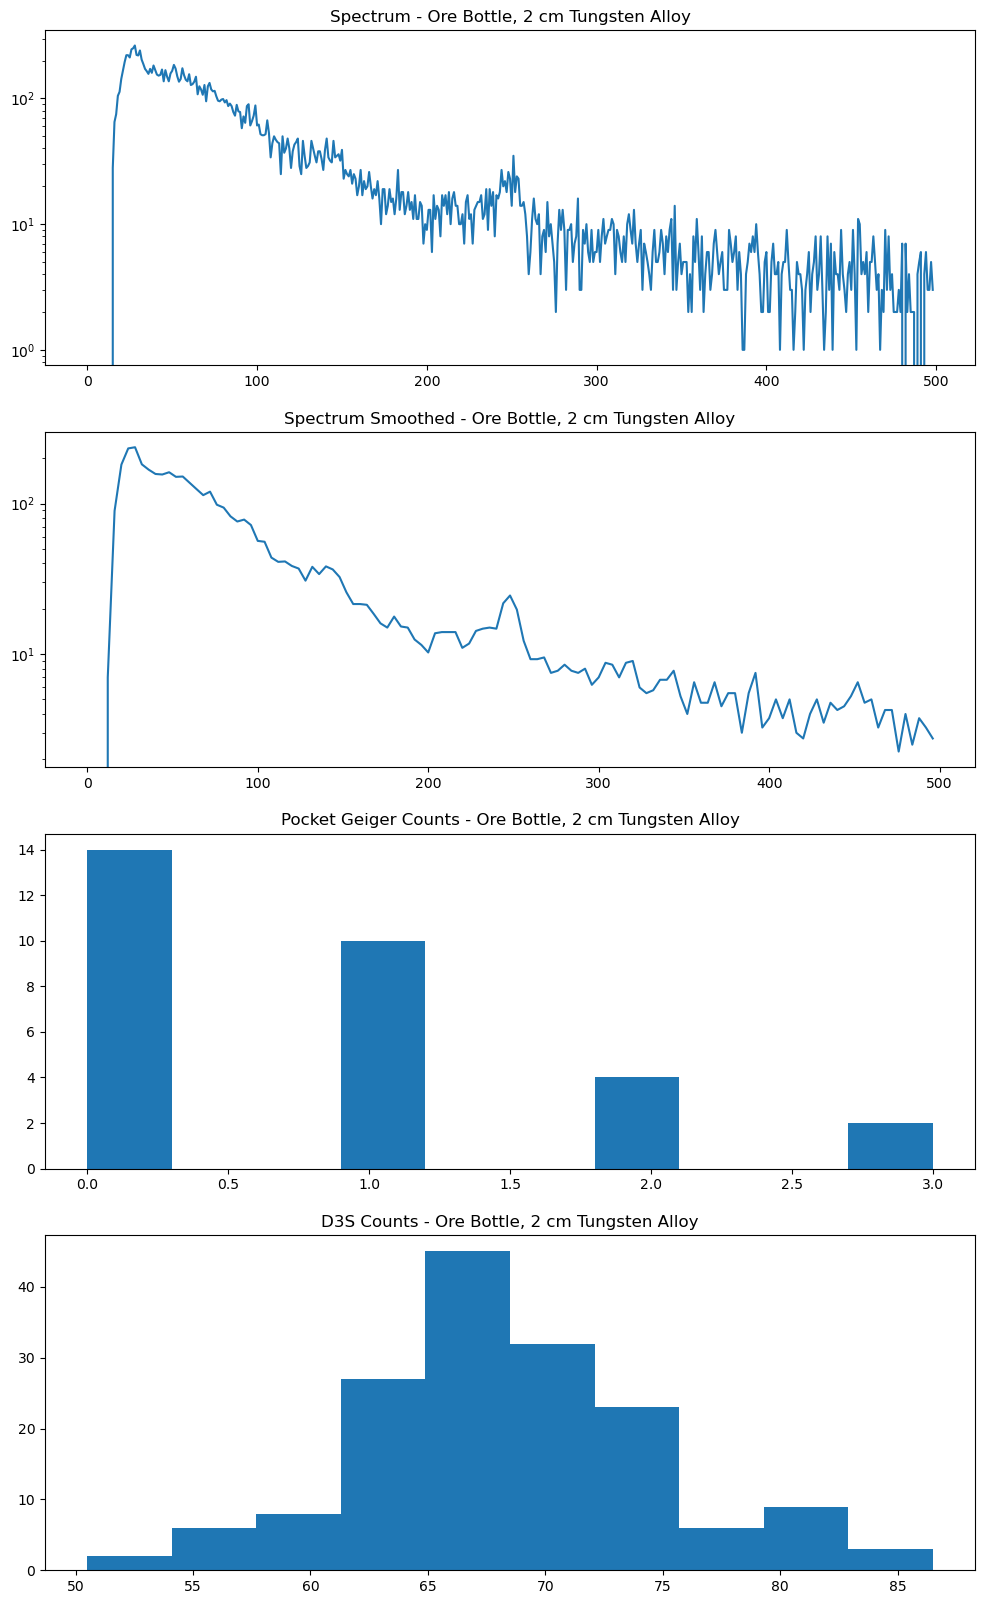

In [15]:
fig9, ax9 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig9, ax9, OB_W2_spectrum, OB_W2_geiger, OB_W2_D3Scount, 'Ore Bottle, 2 cm Tungsten Alloy')

***Sample 3 - Known - Thorium***

In [16]:
TH_NS_spectrum = pd.read_csv("Spectrum_known_thorium_aluminum_2024-04-26_15-55-39.csv").to_numpy()
TH_NS_geiger = pd.read_csv("known_thorium_noshield.csv").to_numpy()
TH_NS_D3Scount = pd.read_csv("known_thorium_noshield_2024-04-26_15-46-50.csv").to_numpy()
TH_AL_spectrum = pd.read_csv("Spectrum_known_thorium_noshield_2024-04-26_15-46-50.csv").to_numpy()
TH_AL_geiger = pd.read_csv("known_thorium_aluminum.csv").to_numpy()
TH_AL_D3Scount = pd.read_csv("known_thorium_aluminum_2024-04-26_15-55-39.csv").to_numpy()
TH_W1_spectrum = pd.read_csv("Spectrum_known_thorium_tungsten1_2024-04-26_16-04-28.csv").to_numpy()
TH_W1_geiger = pd.read_csv("known_thorium_tungsten1.csv").to_numpy()
TH_W1_D3Scount = pd.read_csv("known_thorium_tungsten1_2024-04-26_16-04-28.csv").to_numpy()
TH_W2_spectrum = pd.read_csv("Spectrum_known_thorium_tungsten2_2024-04-26_16-11-20.csv").to_numpy()
TH_W2_geiger = pd.read_csv("known_thorium_tungsten2.csv").to_numpy()
TH_W2_D3Scount = pd.read_csv("known_thorium_tungsten2_2024-04-26_16-11-20.csv").to_numpy()

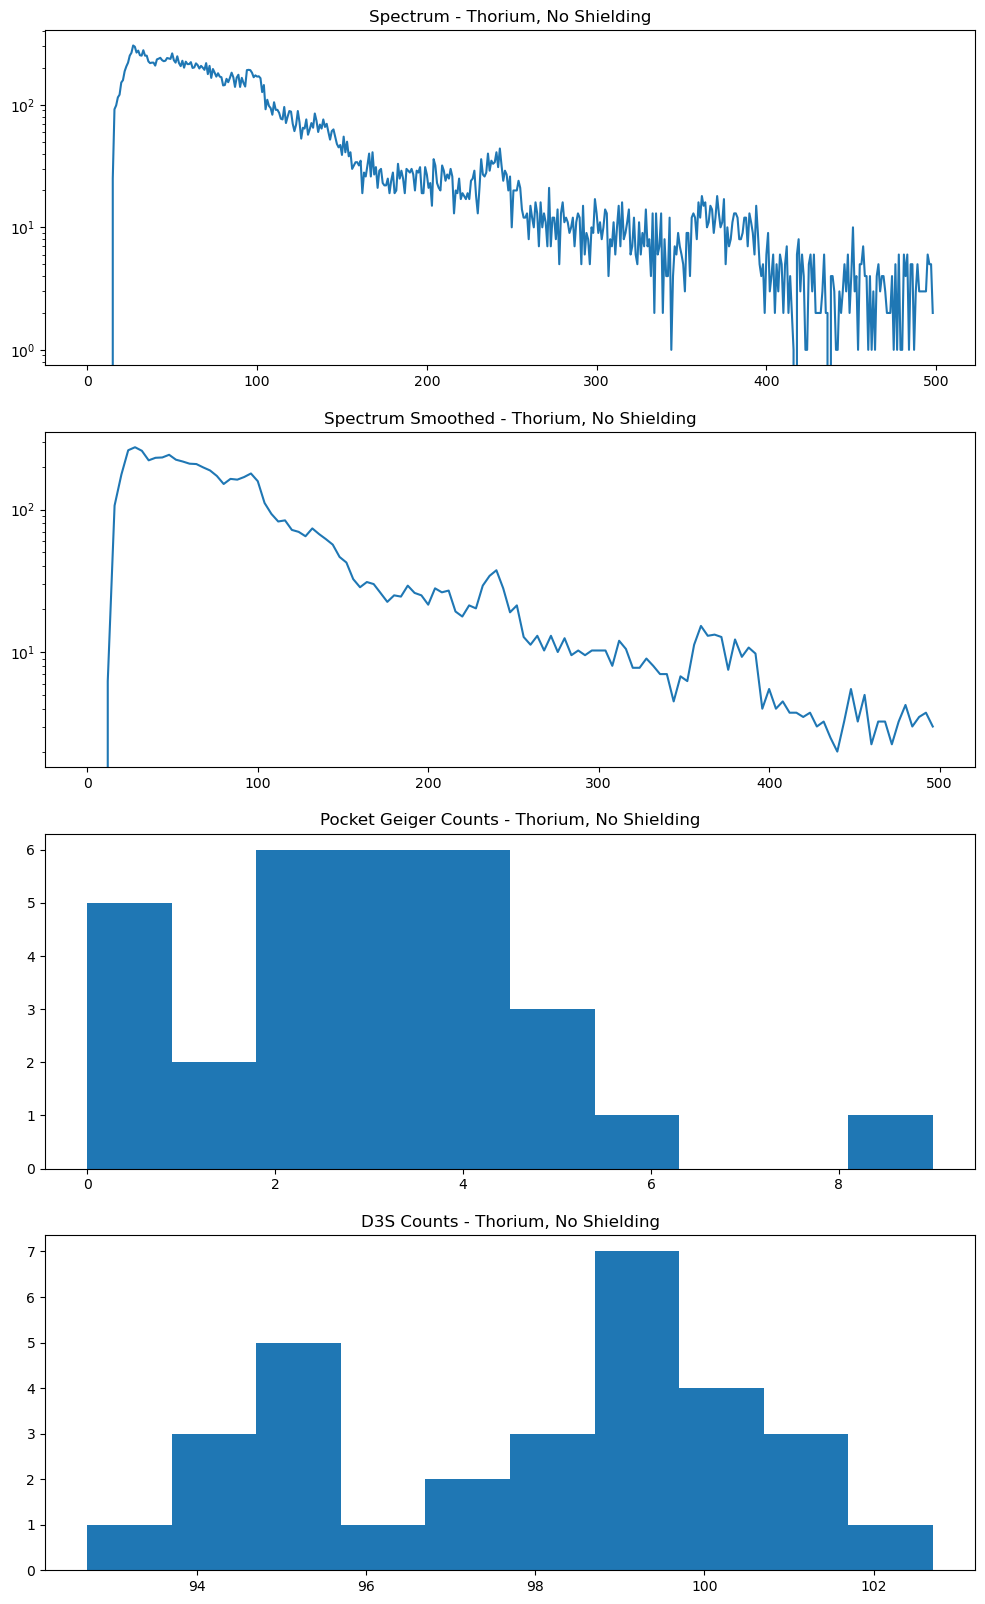

In [17]:
fig10, ax10 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig10, ax10, TH_NS_spectrum, TH_NS_geiger, TH_NS_D3Scount, 'Thorium, No Shielding')

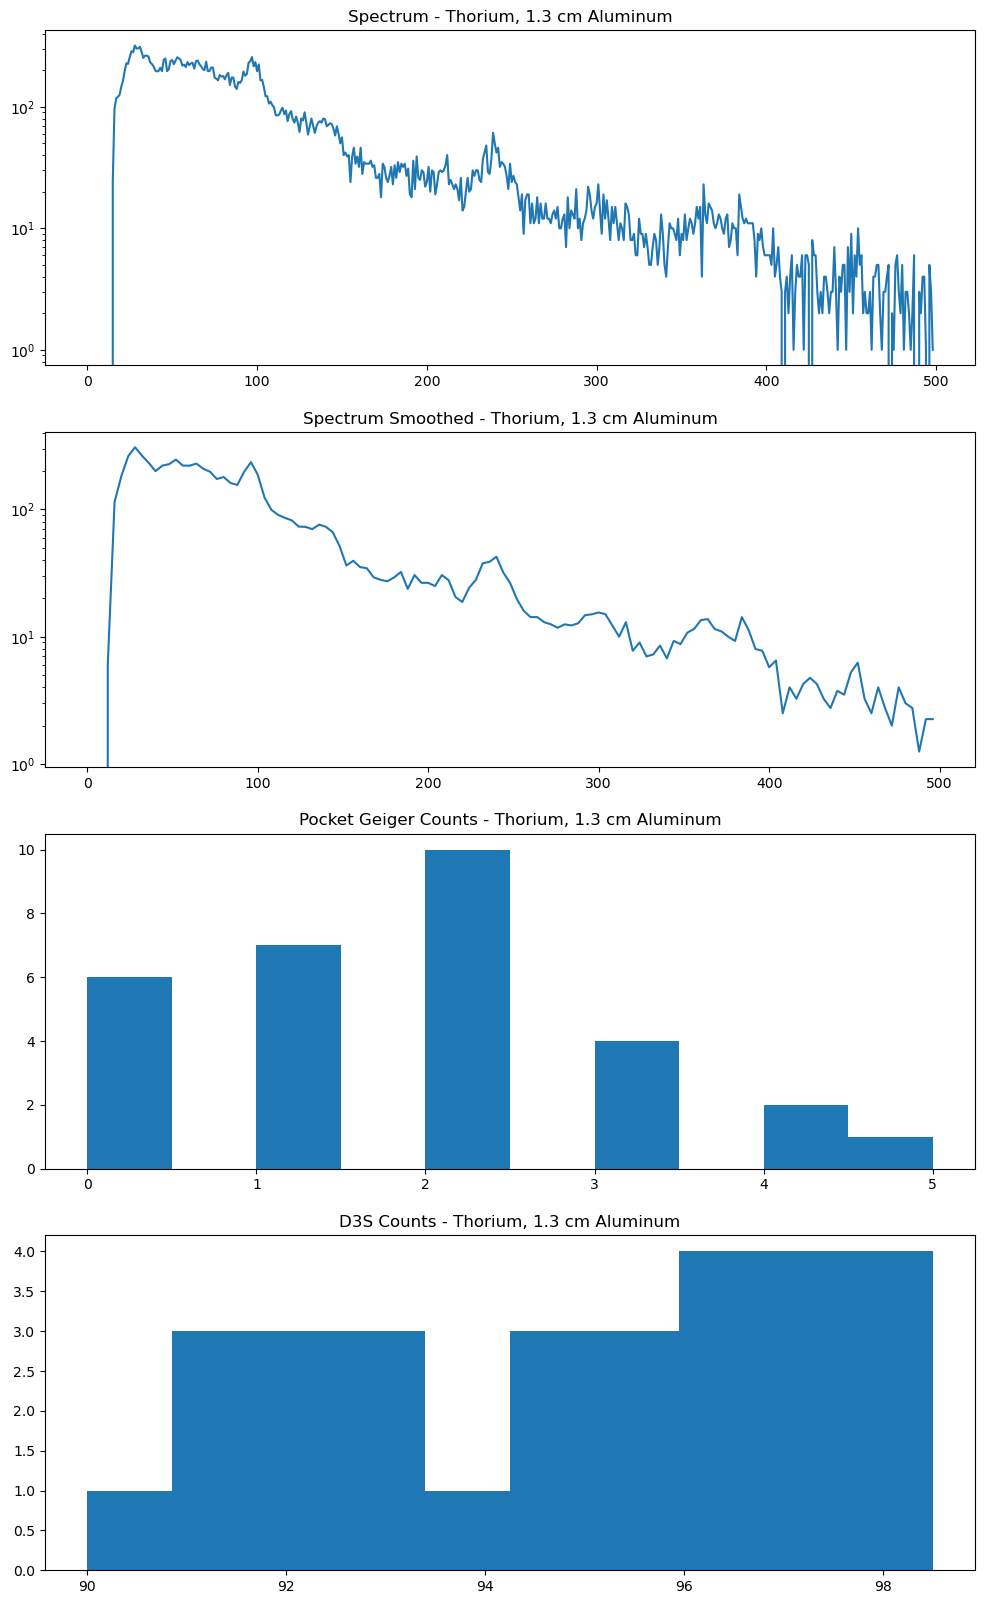

In [18]:
fig11, ax11 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig11, ax11, TH_AL_spectrum, TH_AL_geiger, TH_AL_D3Scount, 'Thorium, 1.3 cm Aluminum')

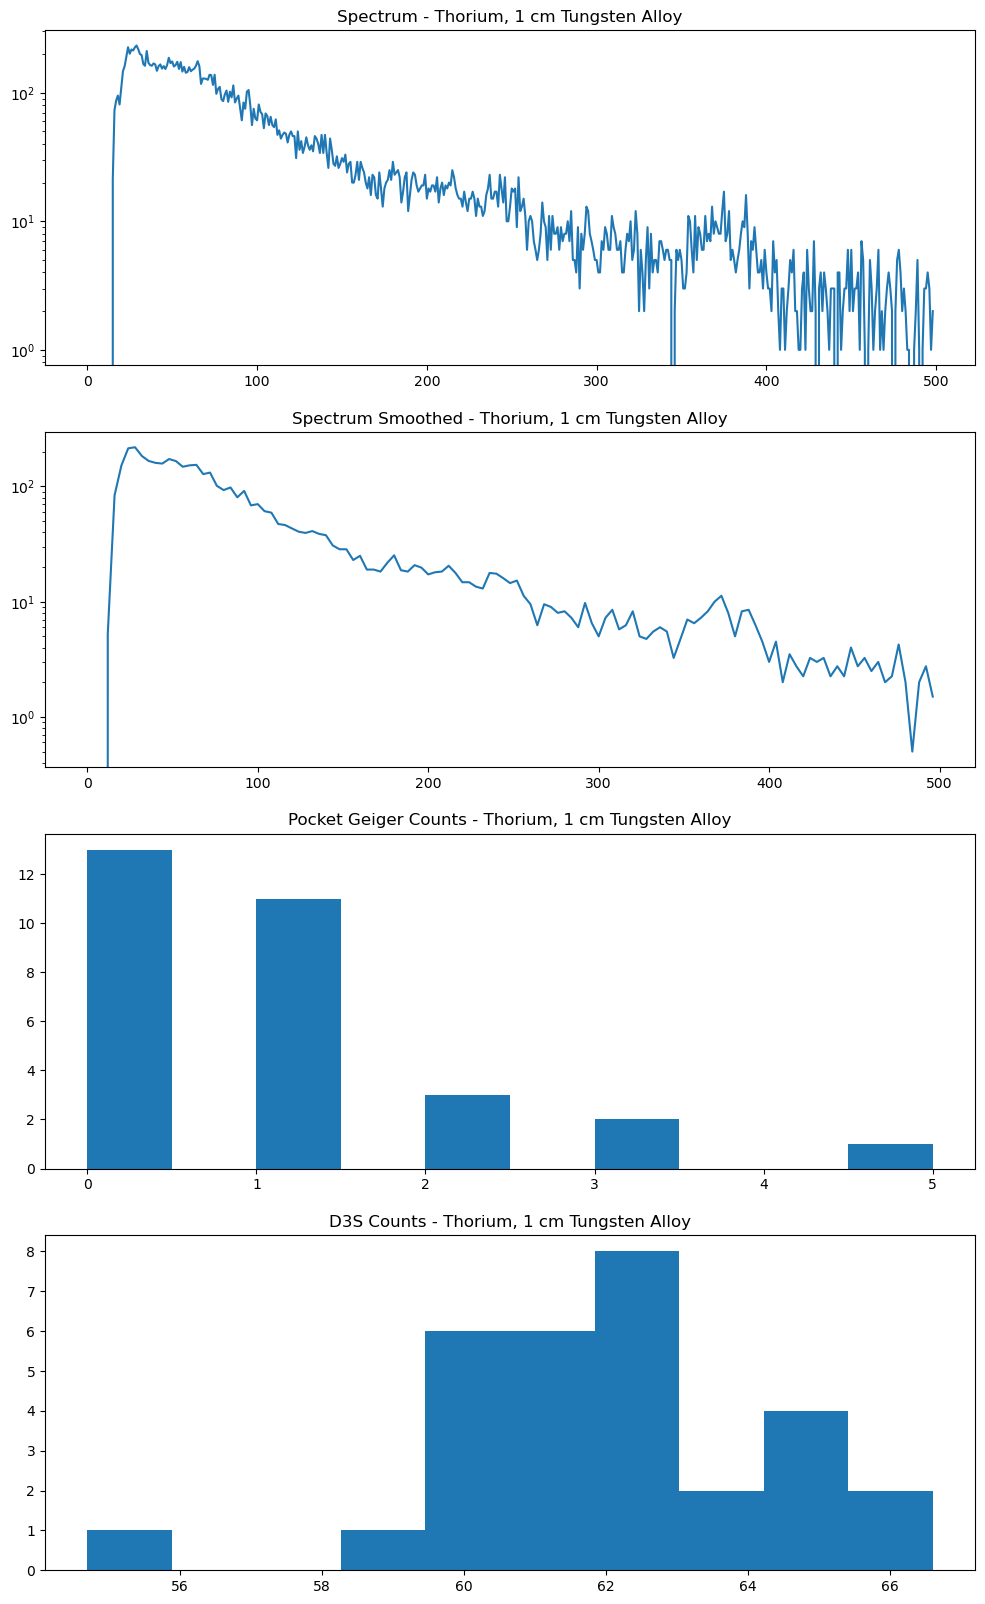

In [19]:
fig12, ax12 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig12, ax12, TH_W1_spectrum, TH_W1_geiger, TH_W1_D3Scount, 'Thorium, 1 cm Tungsten Alloy')

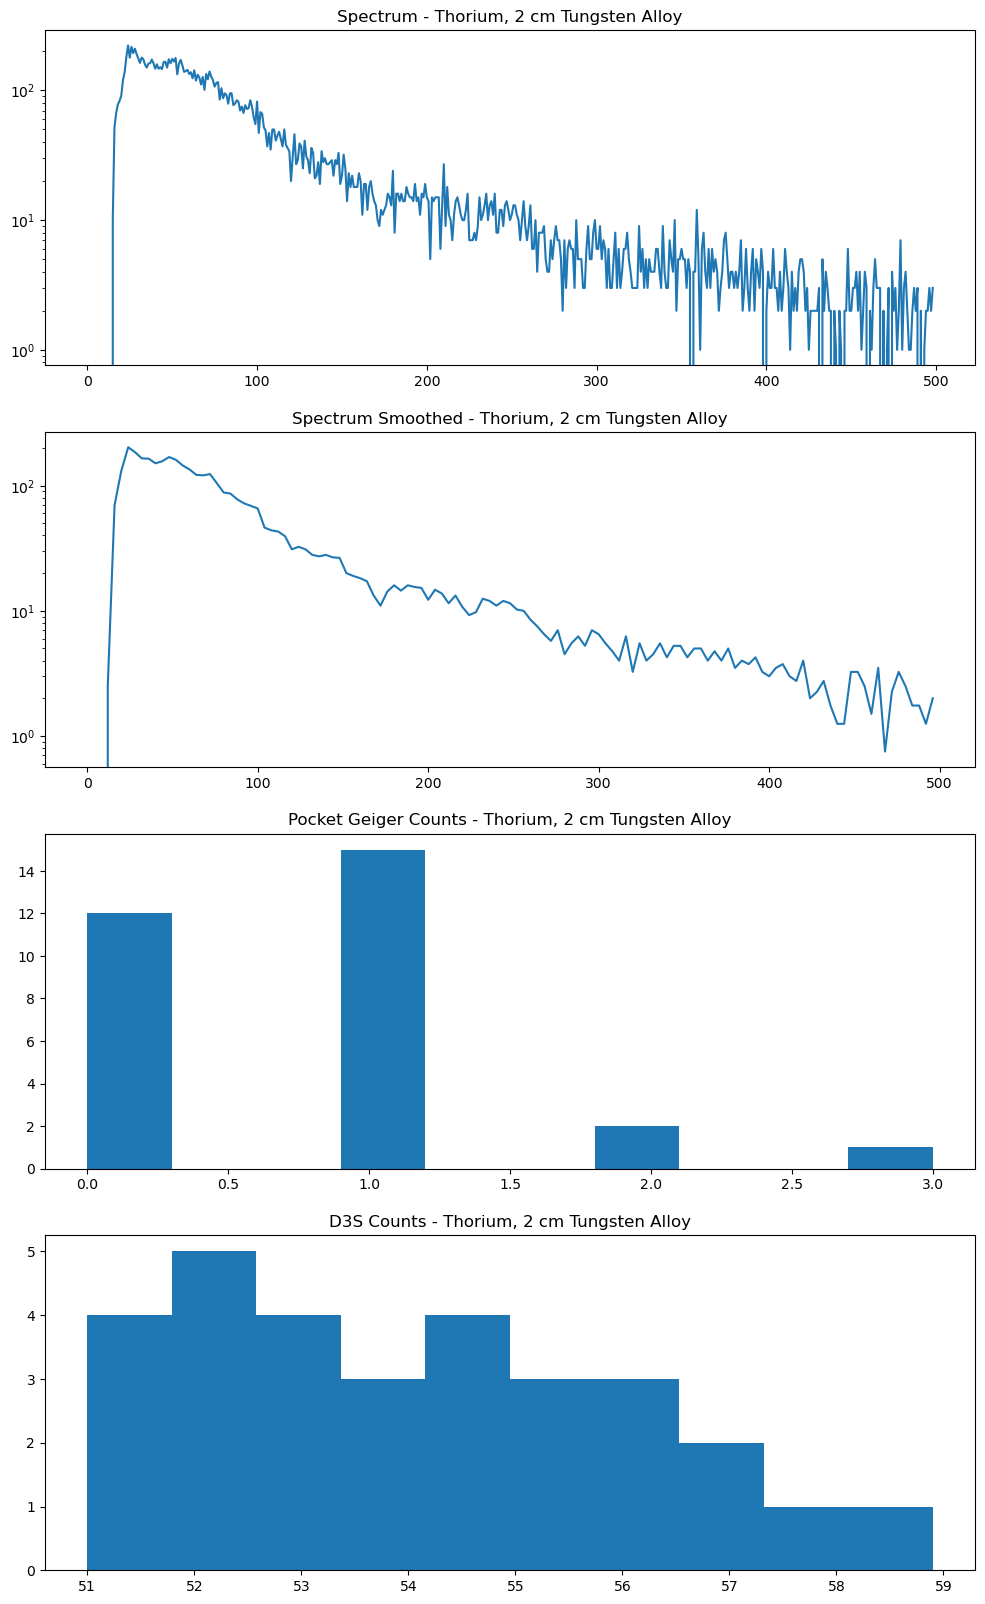

In [20]:
fig13, ax13 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig13, ax13, TH_W2_spectrum, TH_W2_geiger, TH_W2_D3Scount, 'Thorium, 2 cm Tungsten Alloy')

***Sample 4 - Unknown - Rock One***

In [21]:
R1_NS_spectrum = pd.read_csv("Spectrum_unknown_rock1_noshield_2024-04-24_15-50-11.csv").to_numpy()
R1_NS_geiger = pd.read_csv("unknown_rock1_noshield.csv").to_numpy()
R1_NS_D3Scount = pd.read_csv("unknown_rock1_noshield_2024-04-24_15-50-11.csv").to_numpy()
R1_AL_spectrum = pd.read_csv("Spectrum_unknown_rock1_aluminum_2024-04-24_15-56-40.csv").to_numpy()
R1_AL_geiger = pd.read_csv("unknown_rock1_aluminum.csv").to_numpy()
R1_AL_D3Scount = pd.read_csv("unknown_rock1_aluminum_2024-04-24_15-56-40.csv").to_numpy()
R1_W1_spectrum = pd.read_csv("Spectrum_unknown_rock1_tungsten_2024-04-24_16-02-25.csv").to_numpy()
R1_W1_geiger = pd.read_csv("unknown_rock1_tungsten.csv").to_numpy()
R1_W1_D3Scount = pd.read_csv("unknown_rock1_tungsten_2024-04-24_16-02-25.csv").to_numpy()
R1_W2_spectrum = pd.read_csv("Spectrum_unknown_rock_tungsten2_2024-04-24_16-08-09.csv").to_numpy()
R1_W2_geiger = pd.read_csv("unknown_rock1_tungsten2.csv").to_numpy()
R1_W2_D3Scount = pd.read_csv("unknown_rock_tungsten2_2024-04-24_16-08-09.csv").to_numpy()

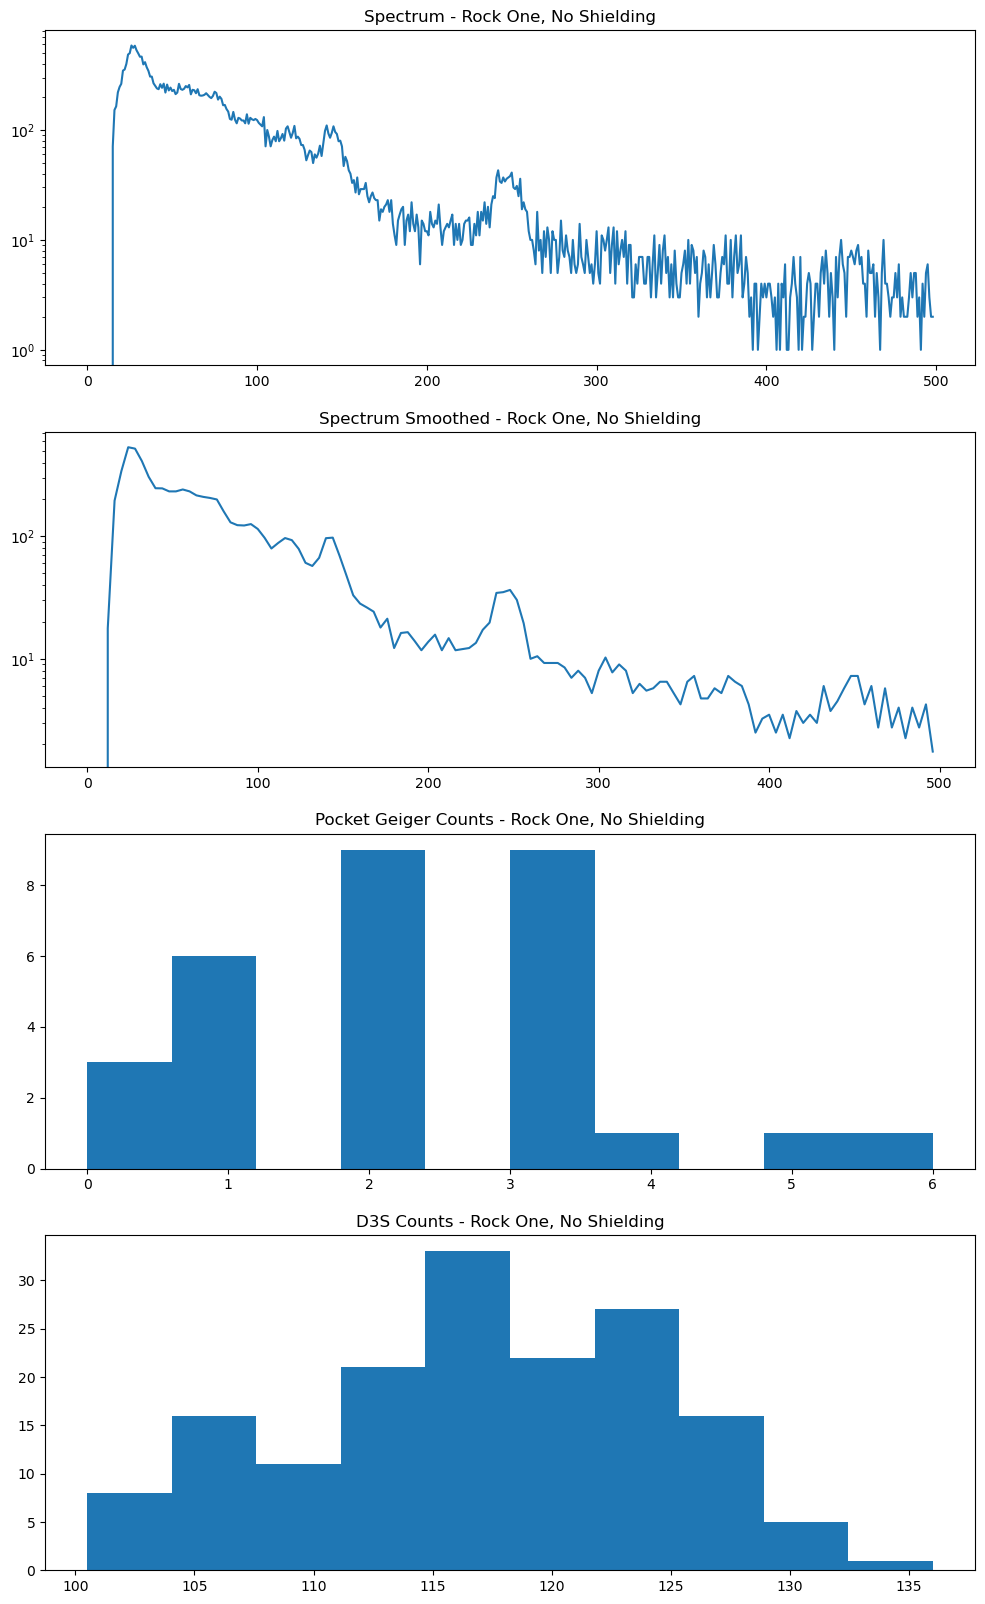

In [22]:
fig14, ax14 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig14, ax14, R1_NS_spectrum, R1_NS_geiger, R1_NS_D3Scount, 'Rock One, No Shielding')

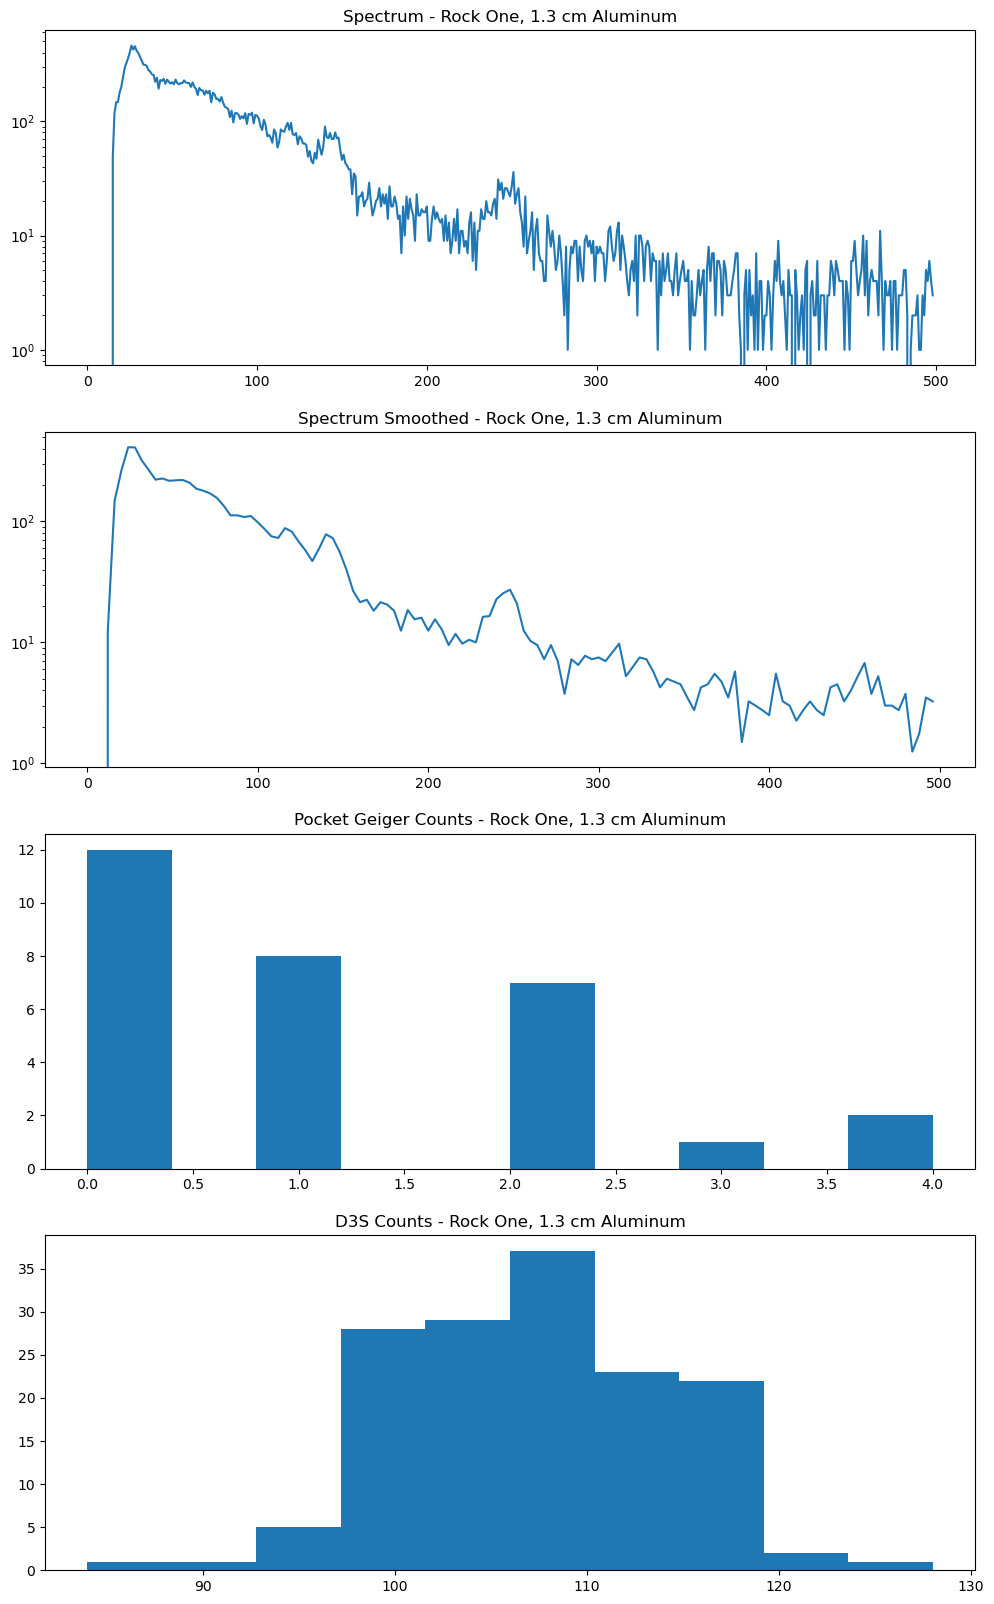

In [23]:
fig15, ax15 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig15, ax15, R1_AL_spectrum, R1_AL_geiger, R1_AL_D3Scount, 'Rock One, 1.3 cm Aluminum')

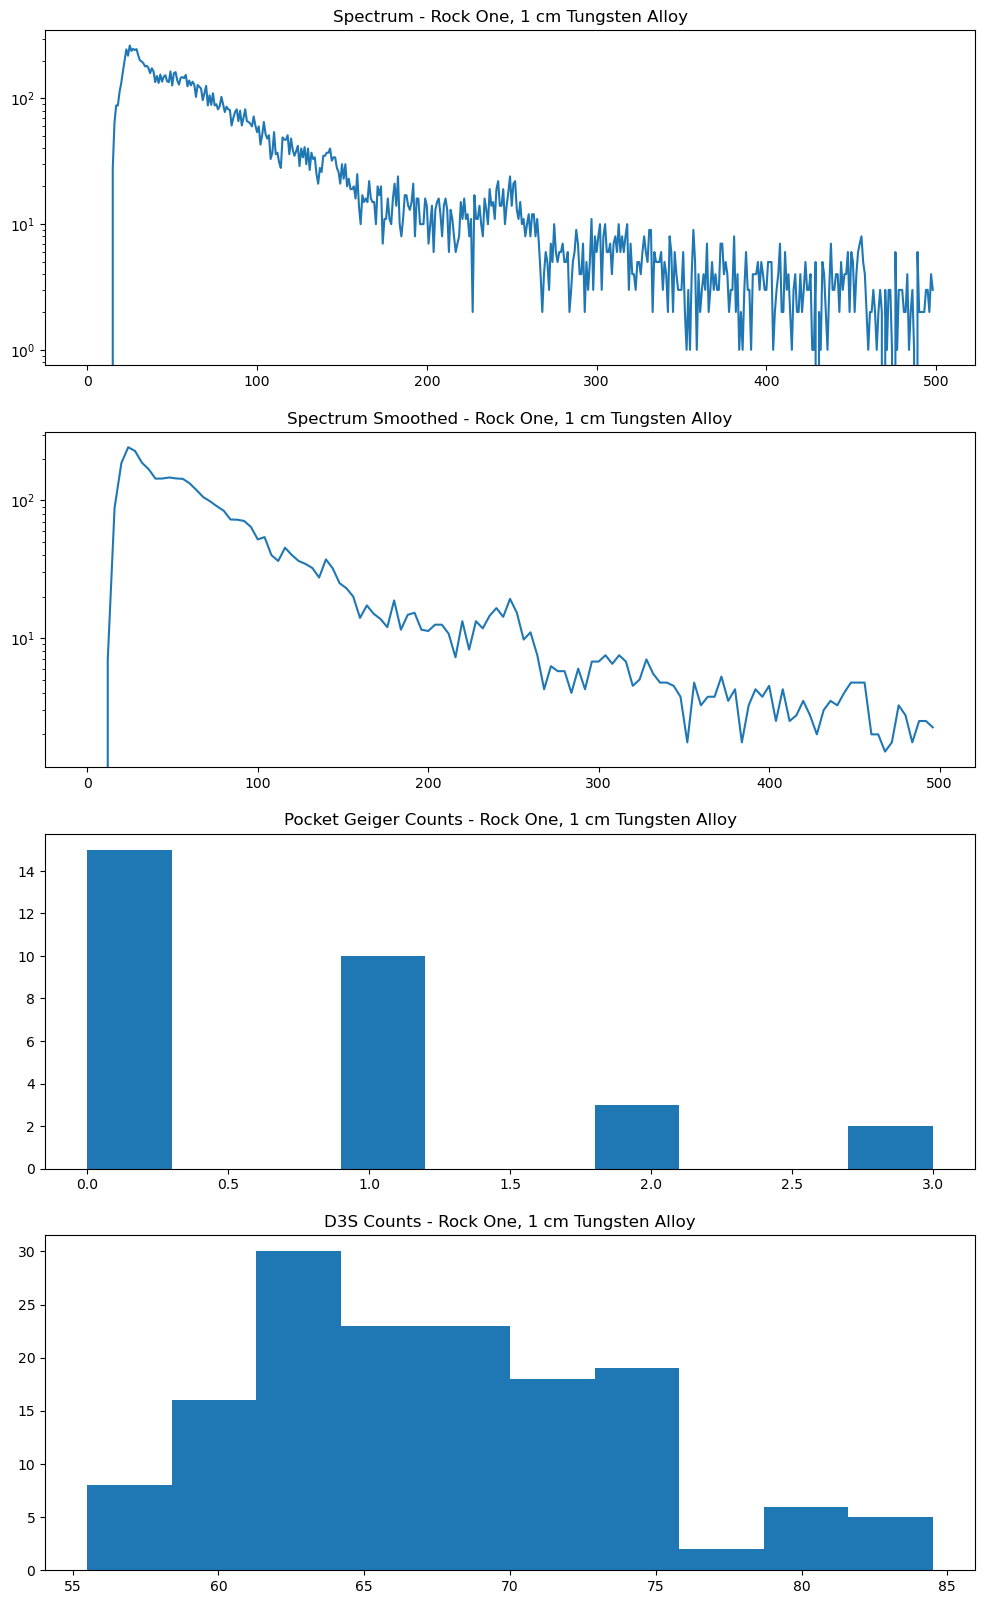

In [24]:
fig16, ax16 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig16, ax16, R1_W1_spectrum, R1_W1_geiger, R1_W1_D3Scount, 'Rock One, 1 cm Tungsten Alloy')

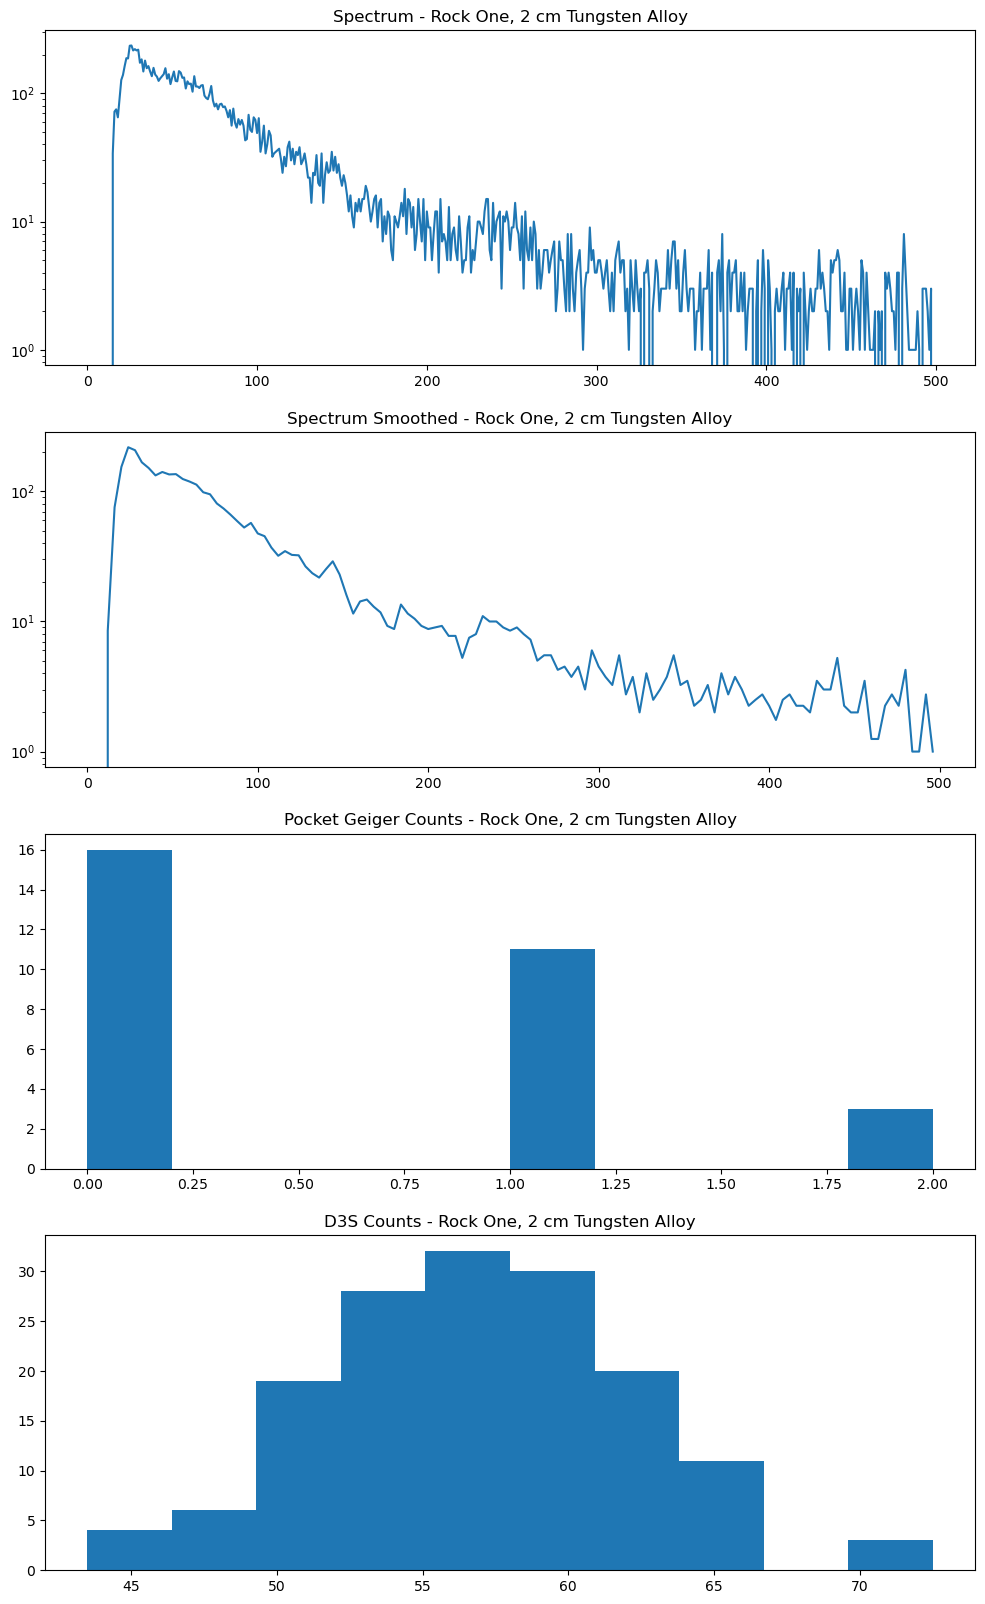

In [25]:
fig17, ax17 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig17, ax17, R1_W2_spectrum, R1_W2_geiger, R1_W2_D3Scount, 'Rock One, 2 cm Tungsten Alloy')

***Sample 5 - Unknown - White Block***

In [26]:
WB_NS_spectrum = pd.read_csv("Spectrum_unknown_whiteblock_noshield_2024-04-26_16-21-16.csv").to_numpy()
WB_NS_geiger = pd.read_csv("unknown_whiteblock_noshield.csv").to_numpy()
WB_NS_D3Scount = pd.read_csv("unknown_whiteblock_noshield_2024-04-26_16-21-16.csv").to_numpy()
WB_AL_spectrum = pd.read_csv("Spectrum_unknown_whiteblock_aluminum_2024-04-26_16-29-35.csv").to_numpy()
WB_AL_geiger = pd.read_csv("unknown_whiteblock_aluminum.csv").to_numpy()
WB_AL_D3Scount = pd.read_csv("unknown_whiteblock_aluminum_2024-04-26_16-29-35.csv").to_numpy()
WB_W1_spectrum = pd.read_csv("Spectrum_unknown_whiteblock_tungsten1_2024-04-26_16-36-17.csv").to_numpy()
WB_W1_geiger = pd.read_csv("unknown_whiteblock_tungsten1.csv").to_numpy()
WB_W1_D3Scount = pd.read_csv("unknown_whiteblock_tungsten1_2024-04-26_16-36-17.csv").to_numpy()
WB_W2_spectrum = pd.read_csv("Spectrum_unknown_whiteblock_tungsten2_2024-04-26_16-43-26.csv").to_numpy()
WB_W2_geiger = pd.read_csv("unknown_whiteblock_tungsten2.csv").to_numpy()
WB_W2_D3Scount = pd.read_csv("unknown_whiteblock_tungsten2_2024-04-26_16-43-26.csv").to_numpy()

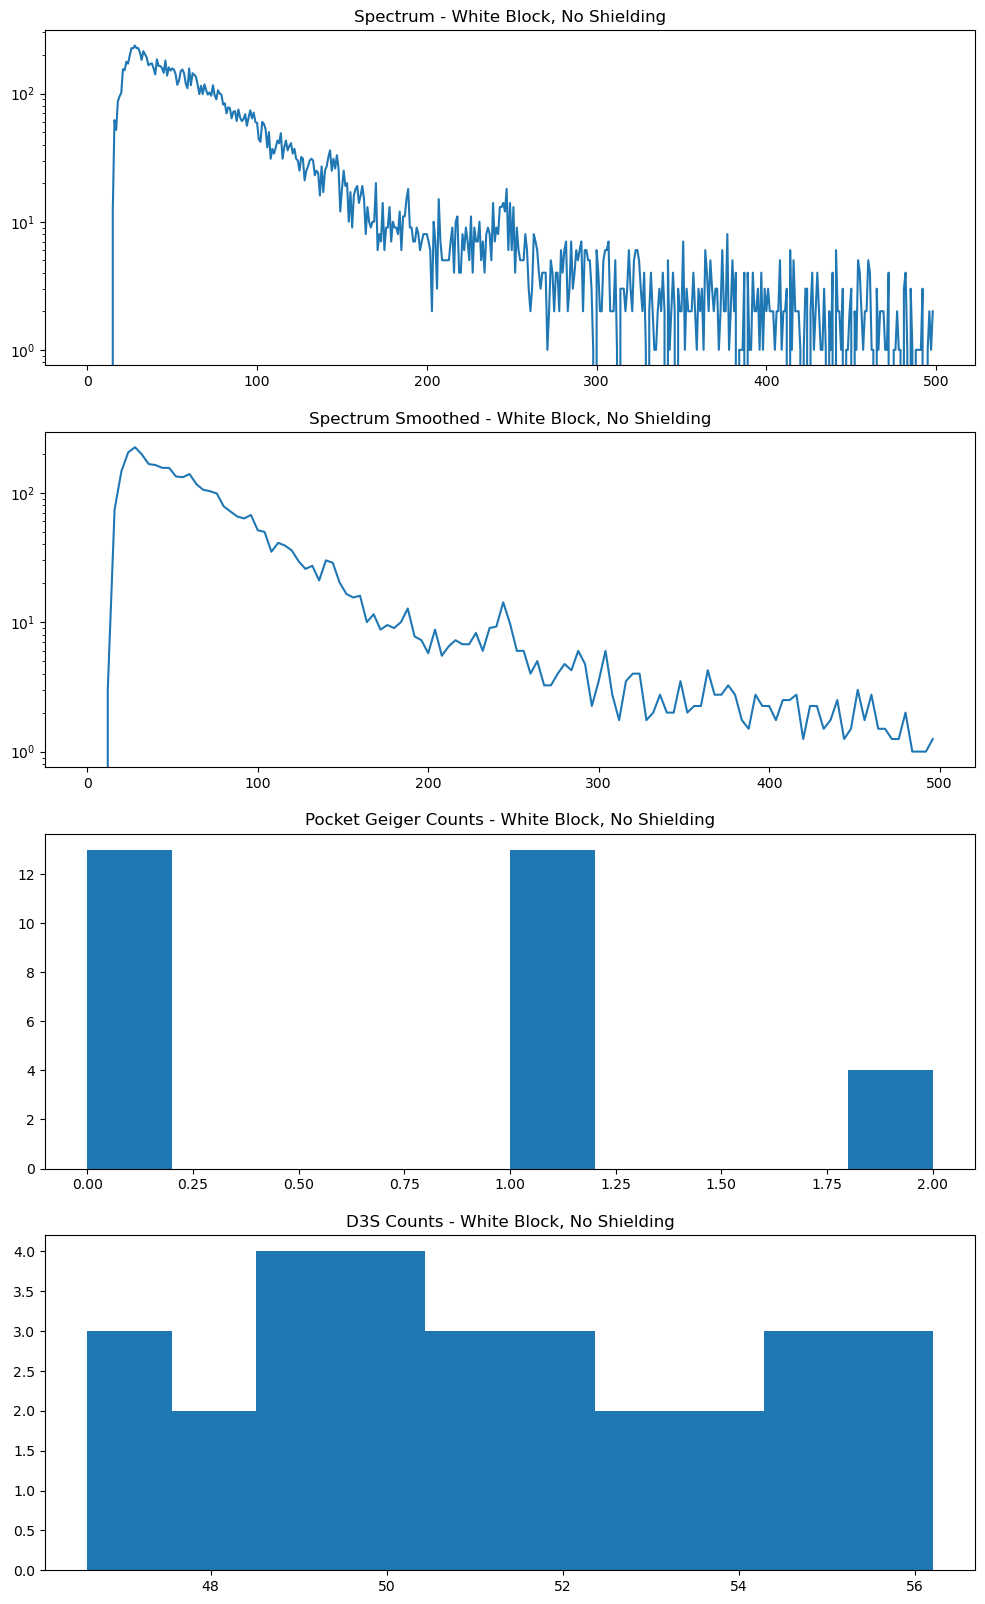

In [27]:
fig18, ax18 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig18, ax18, WB_NS_spectrum, WB_NS_geiger, WB_NS_D3Scount, 'White Block, No Shielding')

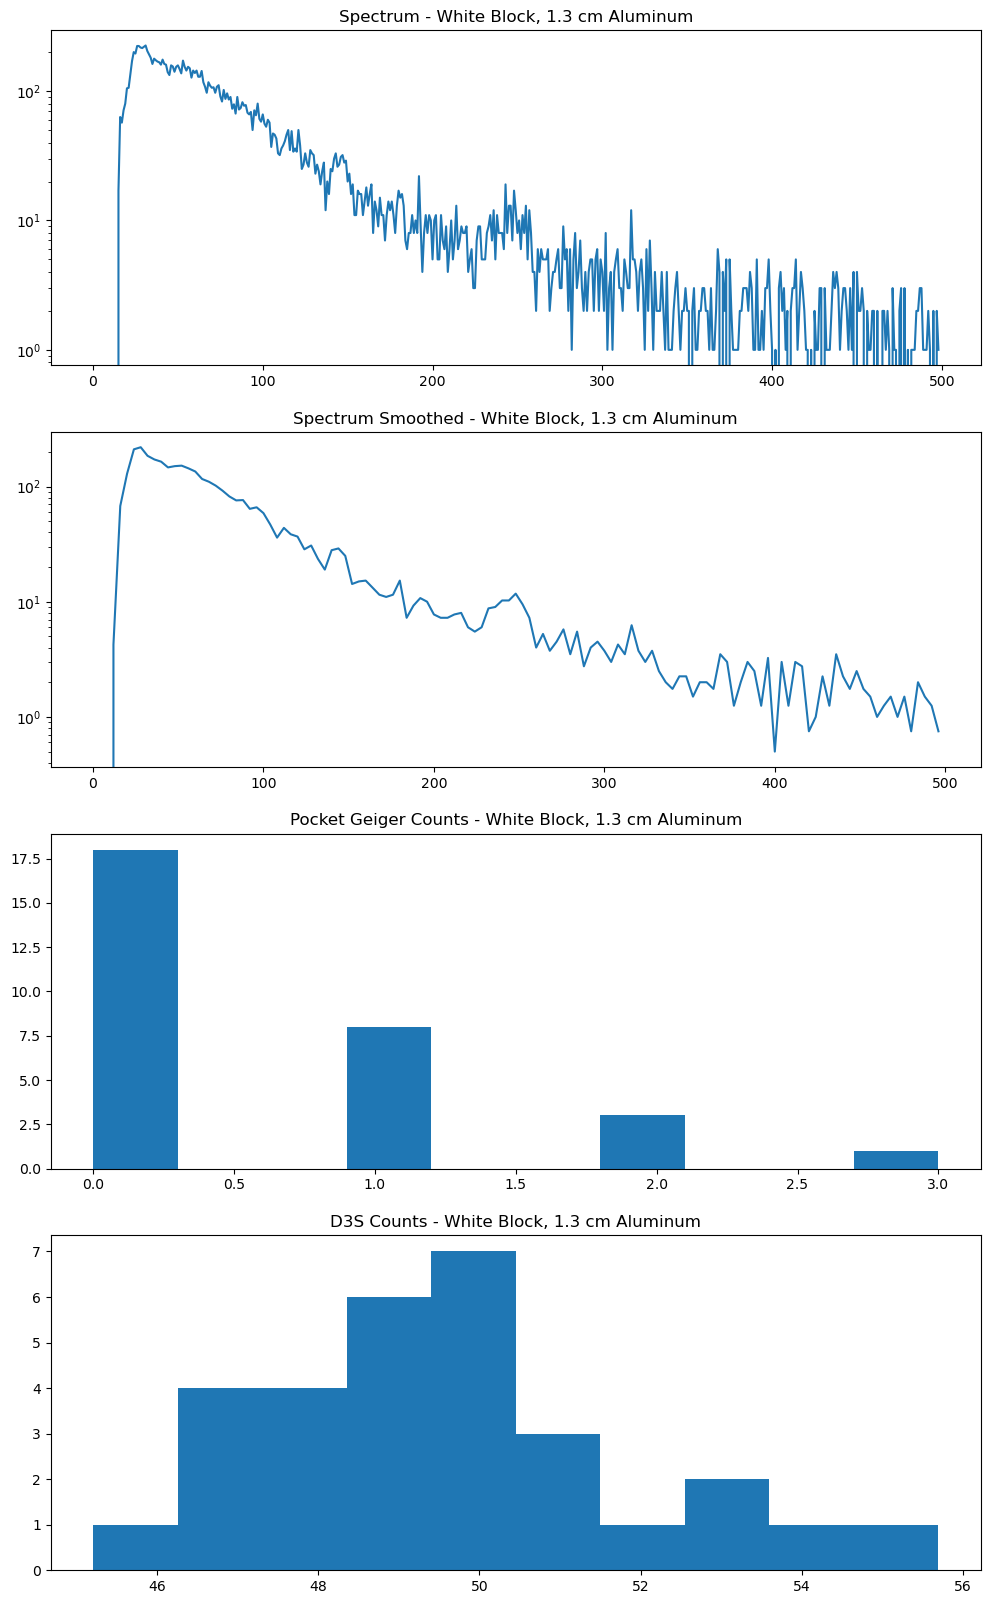

In [28]:
fig19, ax19 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig19, ax19, WB_AL_spectrum, WB_AL_geiger, WB_AL_D3Scount, 'White Block, 1.3 cm Aluminum')

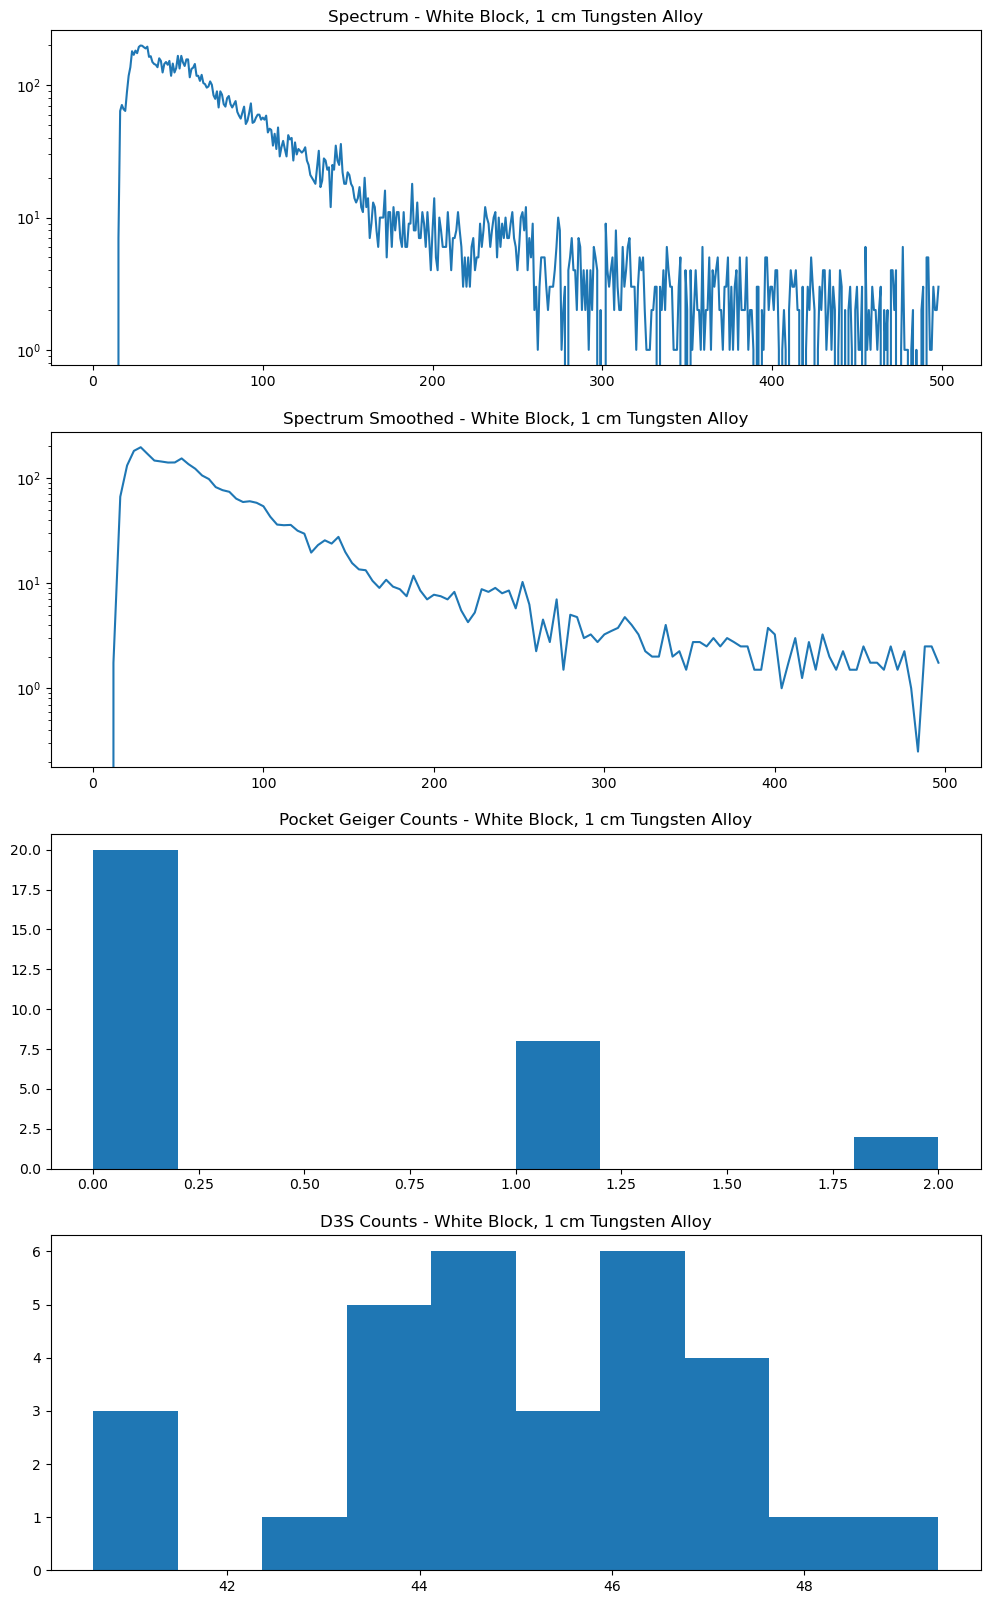

In [29]:
fig20, ax20 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig20, ax20, WB_W1_spectrum, WB_W1_geiger, WB_W1_D3Scount, 'White Block, 1 cm Tungsten Alloy')

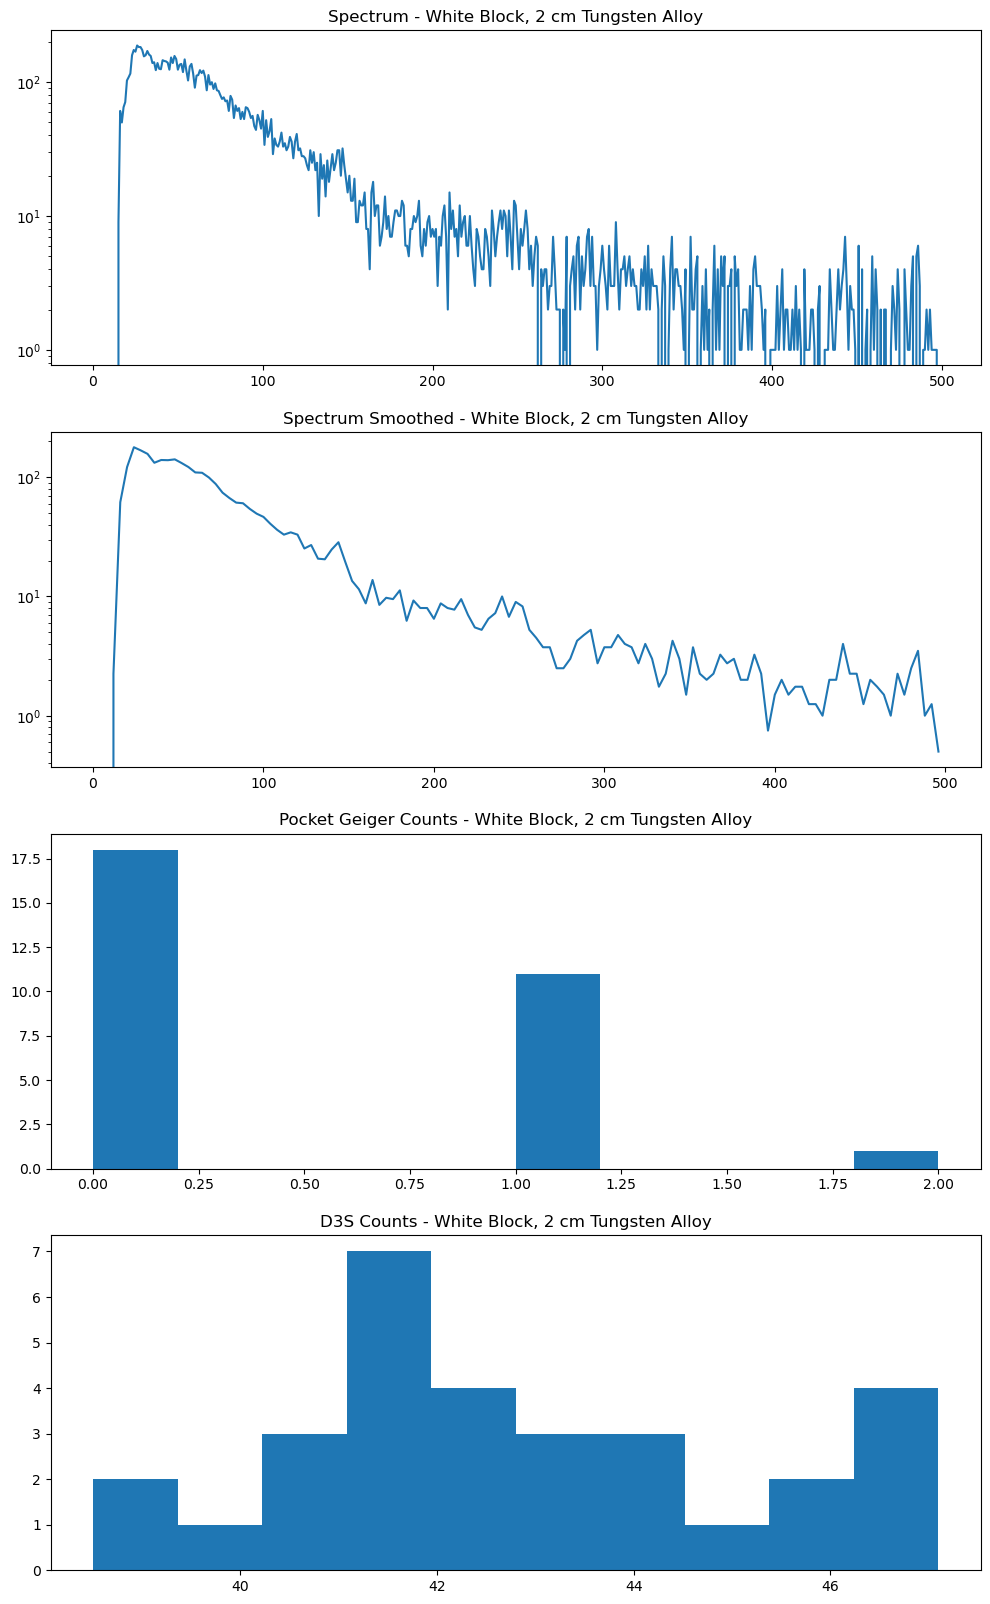

In [30]:
fig21, ax21 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig21, ax21, WB_W2_spectrum, WB_W2_geiger, WB_W2_D3Scount, 'White Block, 2 cm Tungsten Alloy')

***Sample 6 - Unknown - Blue Cheese***

In [31]:
BC_NS_spectrum = pd.read_csv("Spectrum_unknown_bluecheese_noshield_2024-04-26_16-52-40.csv").to_numpy()
BC_NS_geiger = pd.read_csv("unknown_bluecheese_noshield.csv").to_numpy()
BC_NS_D3Scount = pd.read_csv("unknown_bluecheese_noshield_2024-04-26_16-52-40.csv").to_numpy()
BC_AL_spectrum = pd.read_csv("Spectrum_unknown_bluecheese_aluminum_2024-04-26_16-59-07.csv").to_numpy()
BC_AL_geiger = pd.read_csv("unknown_bluecheese_aluminum.csv").to_numpy()
BC_AL_D3Scount = pd.read_csv("unknown_bluecheese_aluminum_2024-04-26_16-59-07.csv").to_numpy()
BC_W1_spectrum = pd.read_csv("Spectrum_unknown_bluecheese_tungsten1_2024-04-26_17-06-11.csv").to_numpy()
BC_W1_geiger = pd.read_csv("unknown_bluecheese_tungsten1.csv").to_numpy()
BC_W1_D3Scount = pd.read_csv("unknown_bluecheese_tungsten1_2024-04-26_17-06-11.csv").to_numpy()
BC_W2_spectrum = pd.read_csv("Spectrum_unknown_bluecheese_tungsten2_2024-04-26_17-15-31.csv").to_numpy()
BC_W2_geiger = pd.read_csv("unknown_bluecheese_tungsten2.csv").to_numpy()
BC_W2_D3Scount = pd.read_csv("unknown_bluecheese_tungsten2_2024-04-26_17-15-31.csv").to_numpy()

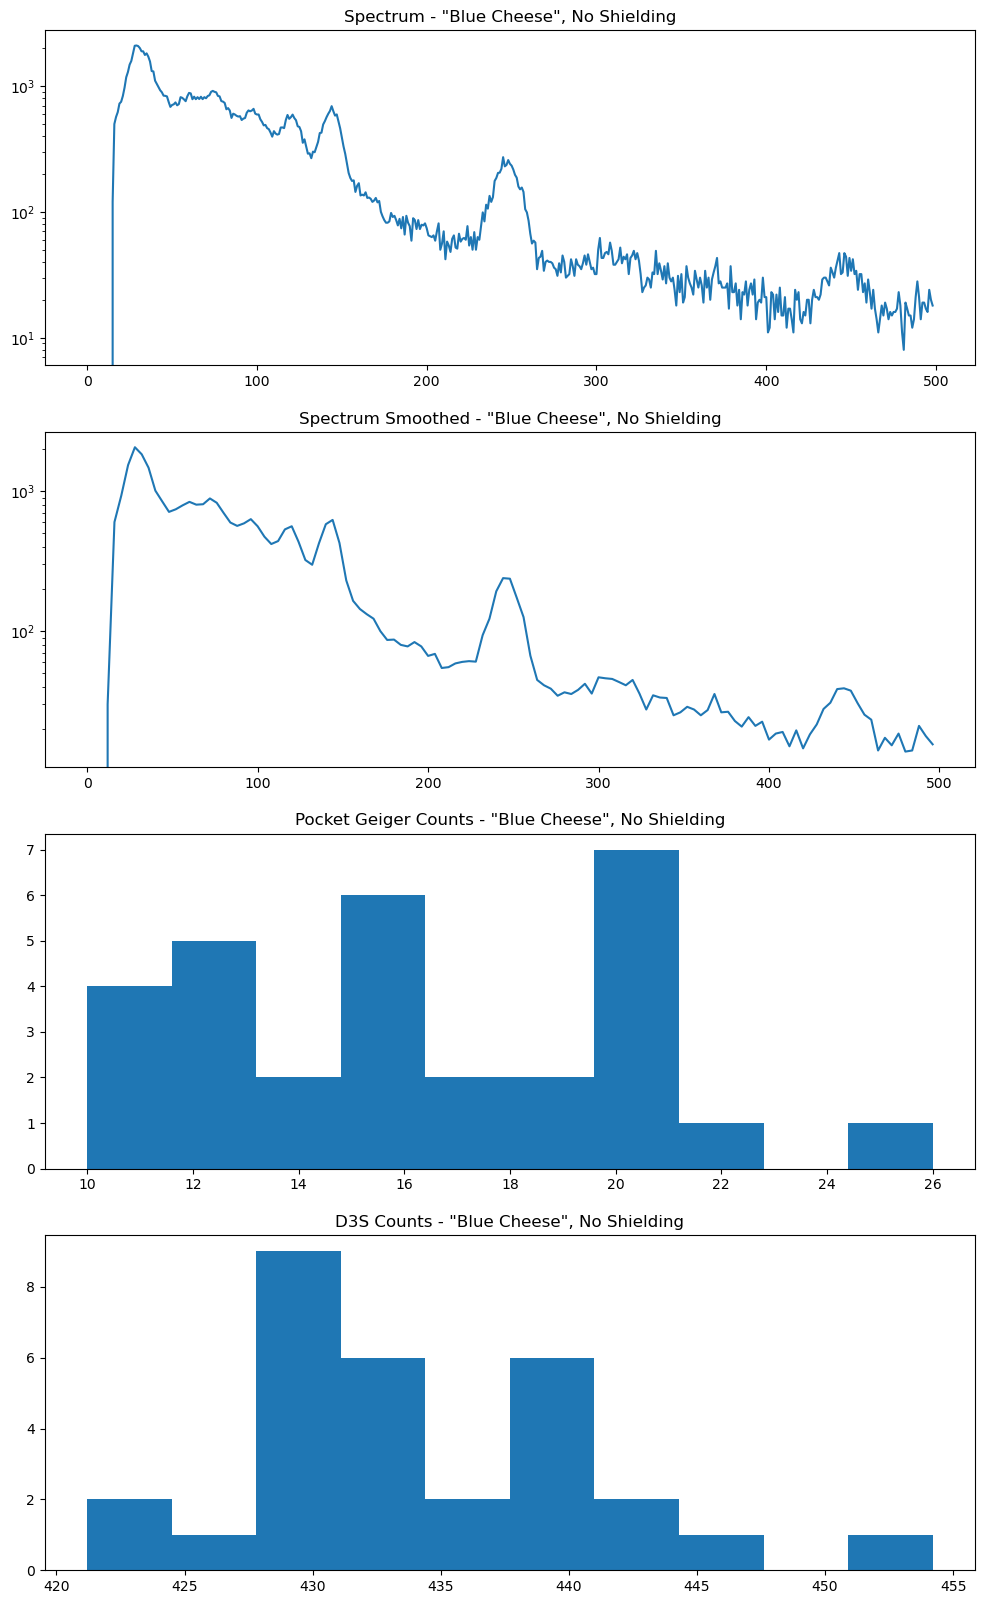

In [32]:
fig22, ax22 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig22, ax22, BC_NS_spectrum, BC_NS_geiger, BC_NS_D3Scount, '"Blue Cheese", No Shielding')

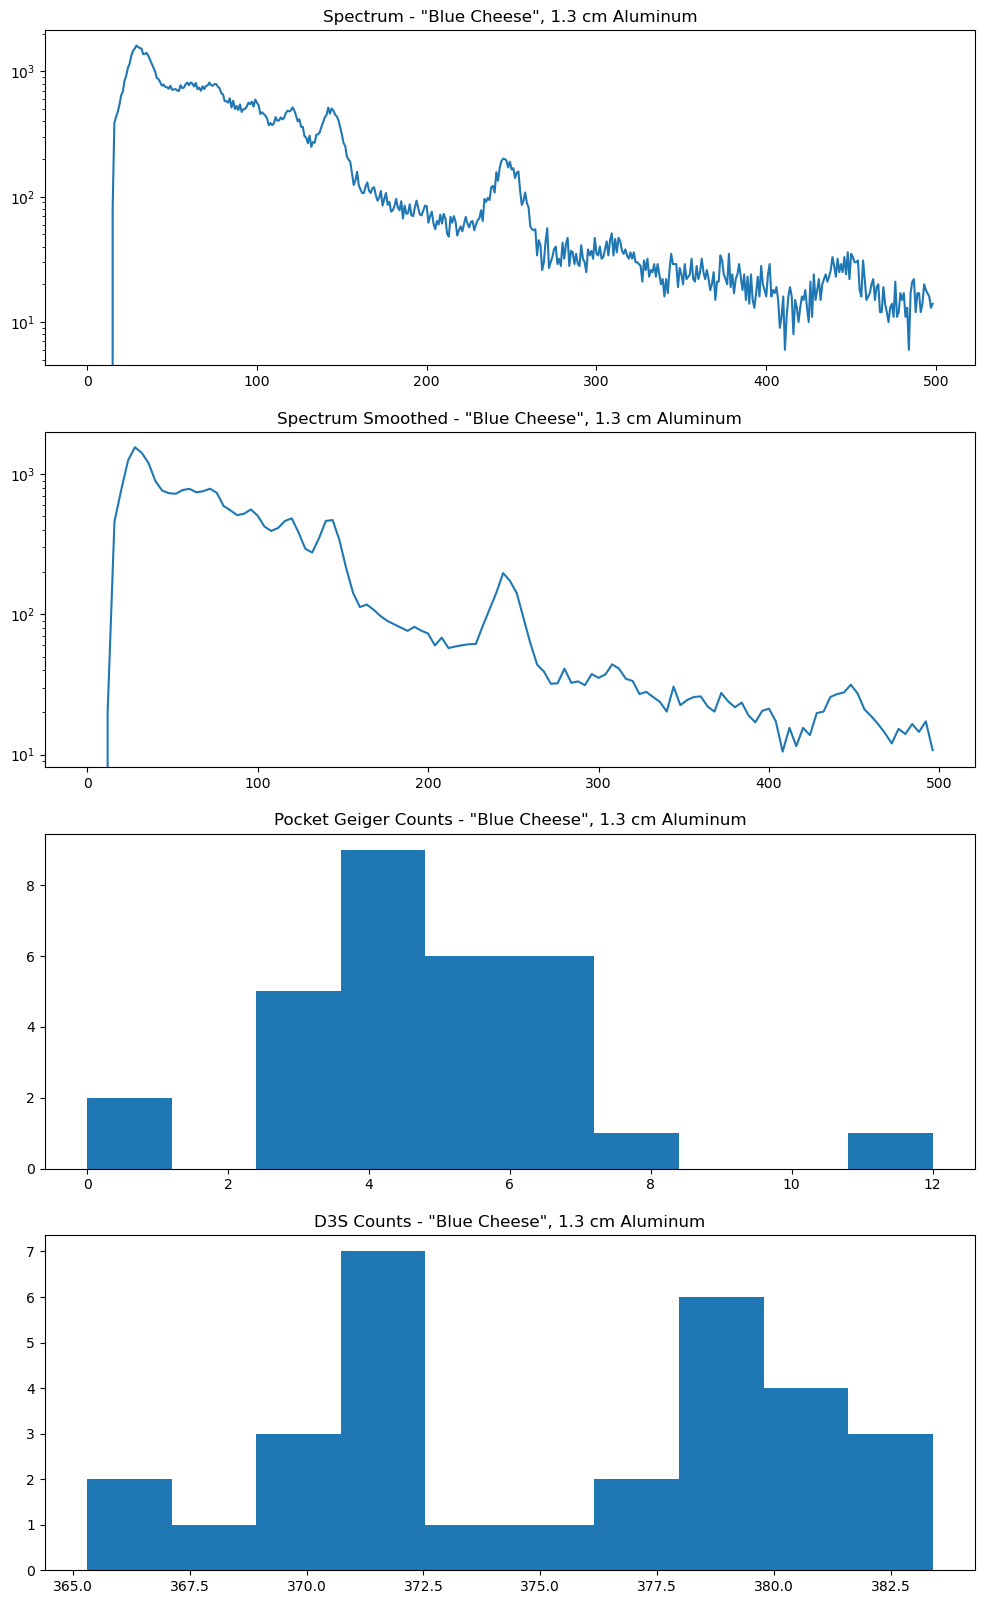

In [33]:
fig23, ax23 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig23, ax23, BC_AL_spectrum, BC_AL_geiger, BC_AL_D3Scount, '"Blue Cheese", 1.3 cm Aluminum')

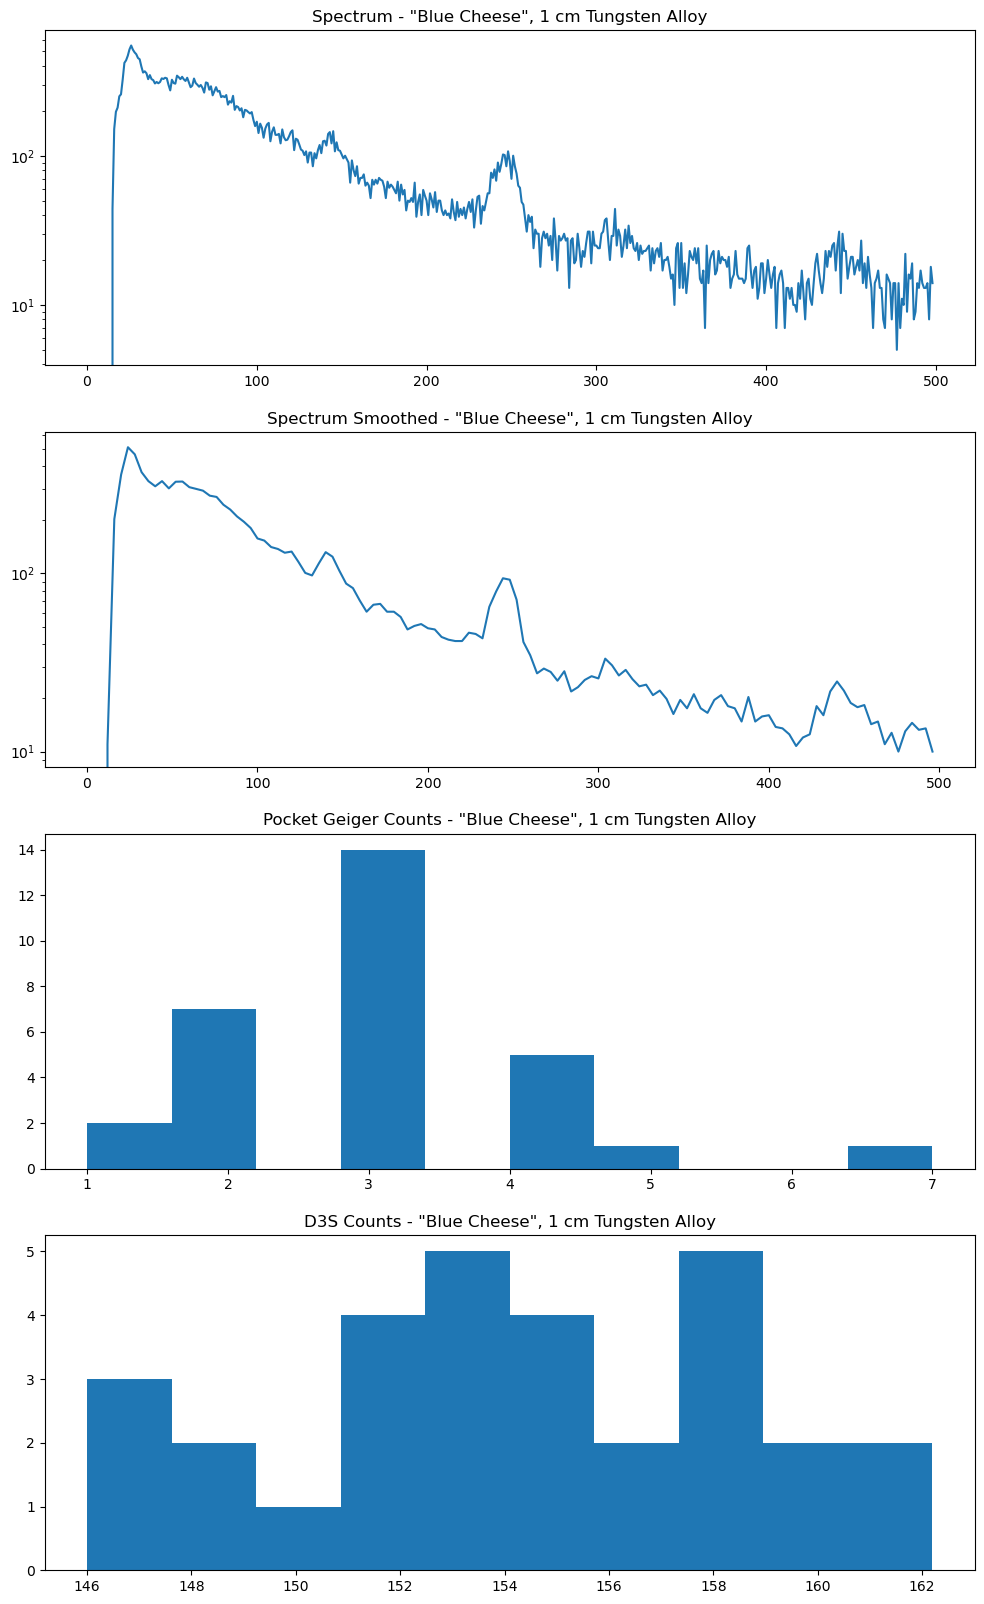

In [34]:
fig24, ax24 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig24, ax24, BC_W1_spectrum, BC_W1_geiger, BC_W1_D3Scount, '"Blue Cheese", 1 cm Tungsten Alloy')

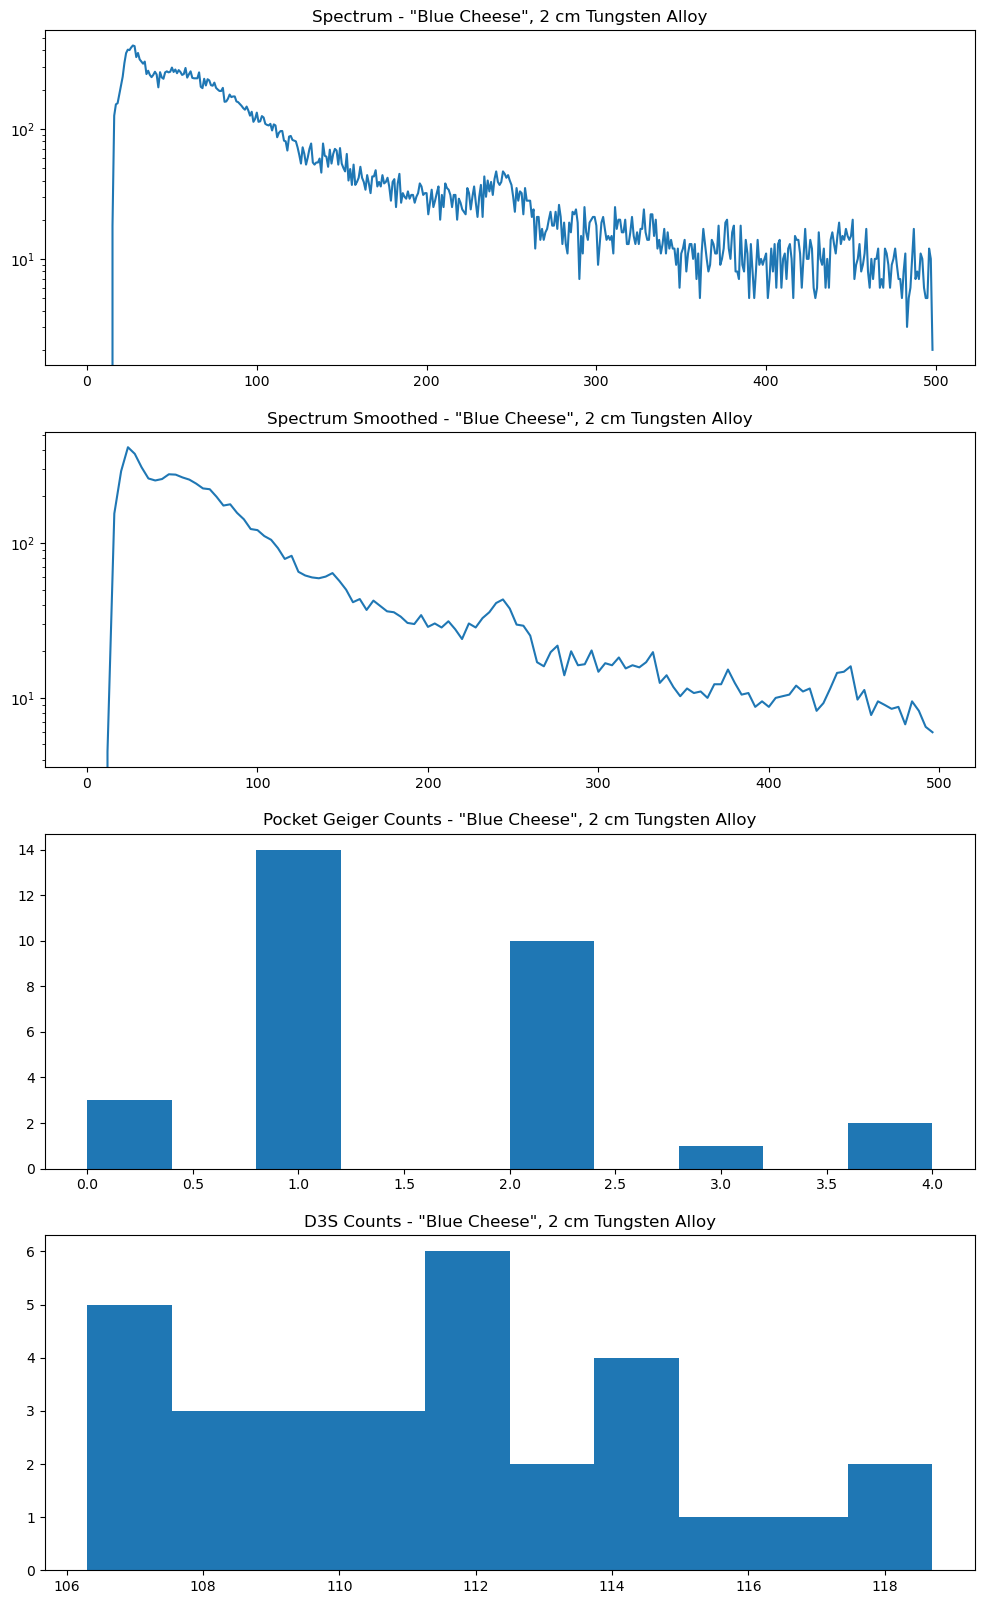

In [35]:
fig25, ax25 = plt.subplots(figsize=(12,20),nrows=4)
graph_quick(fig25, ax25, BC_W2_spectrum, BC_W2_geiger, BC_W2_D3Scount, '"Blue Cheese", 2 cm Tungsten Alloy')

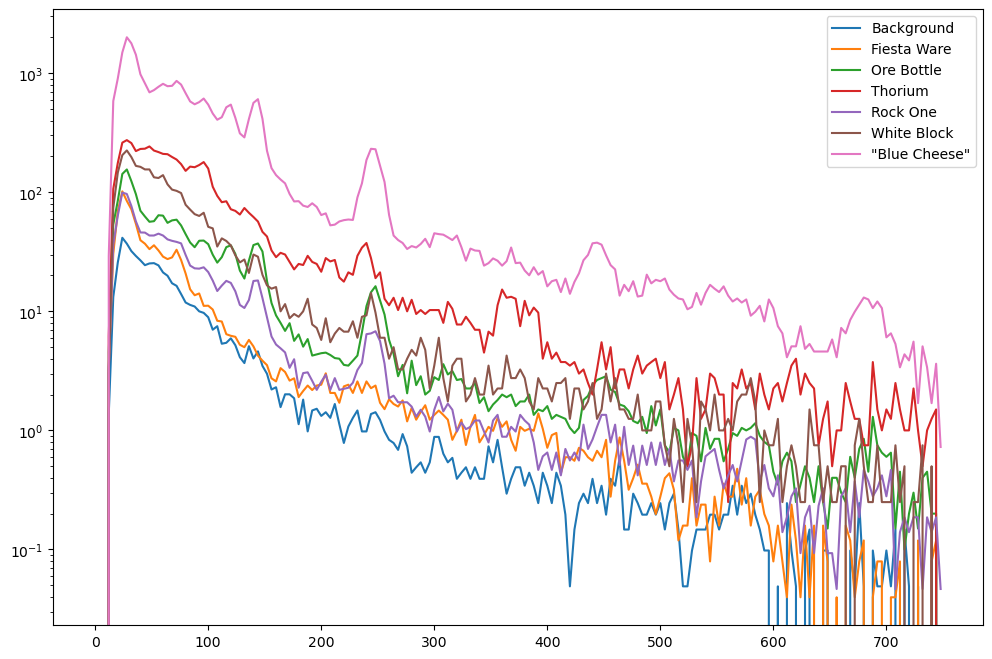

In [85]:
fig26, ax26 = plt.subplots(figsize=(12,8))
graph_smooth(fig26, ax26, bg_spectrum, 'Background')
graph_smooth(fig26, ax26, FW_NS_spectrum, 'Fiesta Ware')
graph_smooth(fig26, ax26, OB_NS_spectrum, 'Ore Bottle')
graph_smooth(fig26, ax26, TH_NS_spectrum, 'Thorium')
graph_smooth(fig26, ax26, R1_NS_spectrum, 'Rock One')
graph_smooth(fig26, ax26, WB_NS_spectrum, 'White Block')
graph_smooth(fig26, ax26, BC_NS_spectrum, '"Blue Cheese"')
ax26.legend()

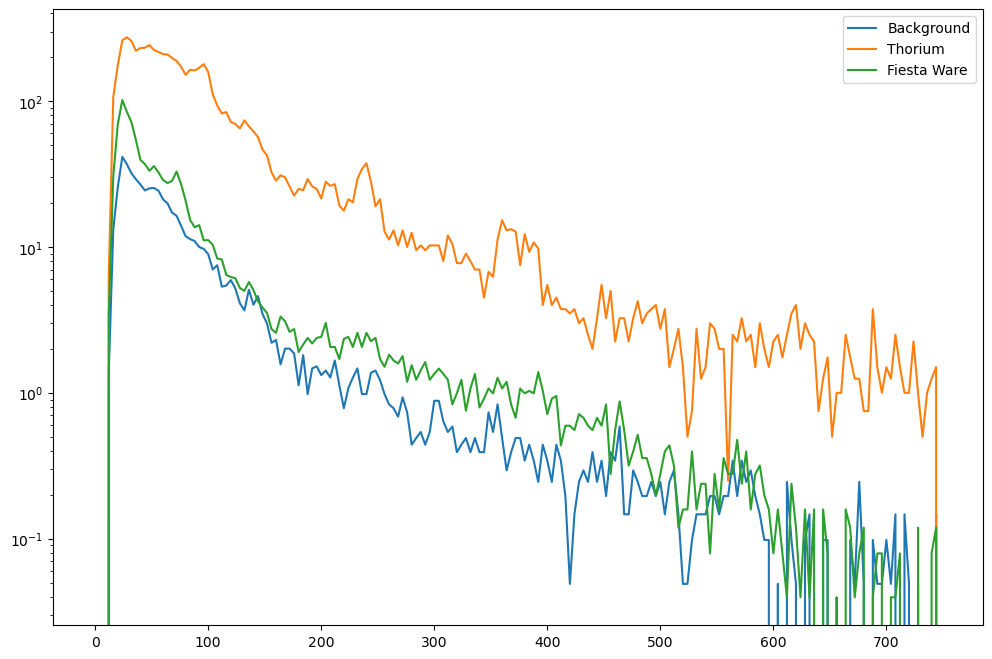

In [97]:
fig27, ax27 = plt.subplots(figsize=(12,8))
graph_smooth(fig27, ax27, bg_spectrum, 'Background')
graph_smooth(fig27, ax27, TH_NS_spectrum, 'Thorium')
graph_smooth(fig27, ax27, FW_NS_spectrum, 'Fiesta Ware')
ax27.legend()

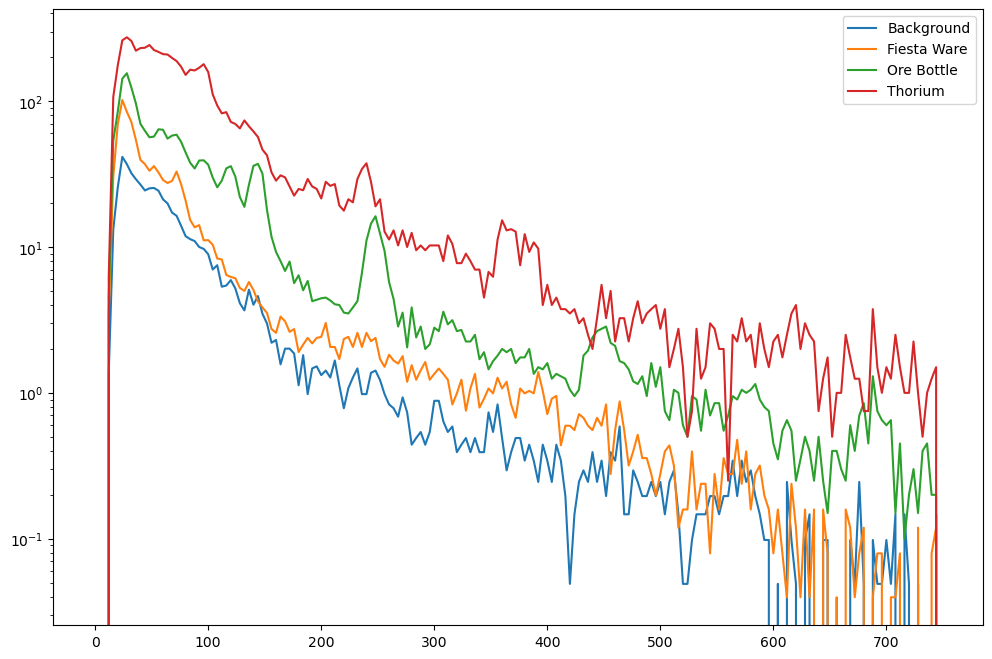

In [87]:
fig28, ax28 = plt.subplots(figsize=(12,8))
graph_smooth(fig28, ax28, bg_spectrum, 'Background')
graph_smooth(fig28, ax28, FW_NS_spectrum, 'Fiesta Ware')
graph_smooth(fig28, ax28, OB_NS_spectrum, 'Ore Bottle')
graph_smooth(fig28, ax28, TH_NS_spectrum, 'Thorium')
ax28.legend()

In [73]:
print(OB_NS_spectrum.shape)
print(BC_NS_spectrum.shape)
print(bg_spectrum.shape)

(150, 1025)
(31, 1025)
(153, 1025)


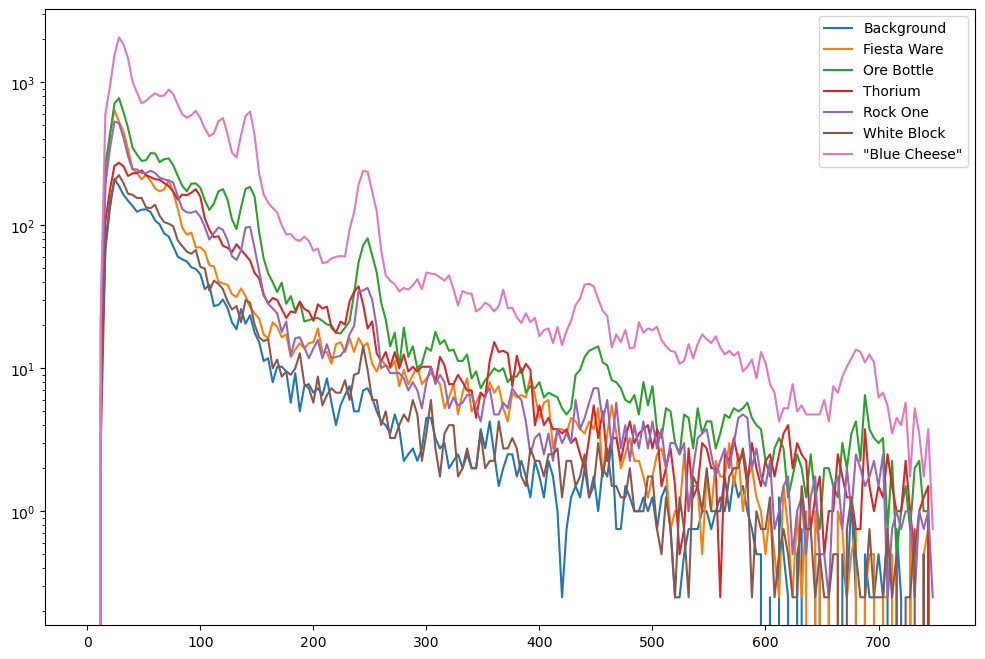

In [101]:
fig29, ax29 = plt.subplots(figsize=(12,8))
graph_smooth_unpro(fig29, ax29, bg_spectrum, 'Background')
graph_smooth_unpro(fig29, ax29, FW_NS_spectrum, 'Fiesta Ware')
graph_smooth_unpro(fig29, ax29, OB_NS_spectrum, 'Ore Bottle')
graph_smooth_unpro(fig29, ax29, TH_NS_spectrum, 'Thorium')
graph_smooth_unpro(fig29, ax29, R1_NS_spectrum, 'Rock One')
graph_smooth_unpro(fig29, ax29, WB_NS_spectrum, 'White Block')
graph_smooth_unpro(fig29, ax29, BC_NS_spectrum, '"Blue Cheese"')
ax29.legend()

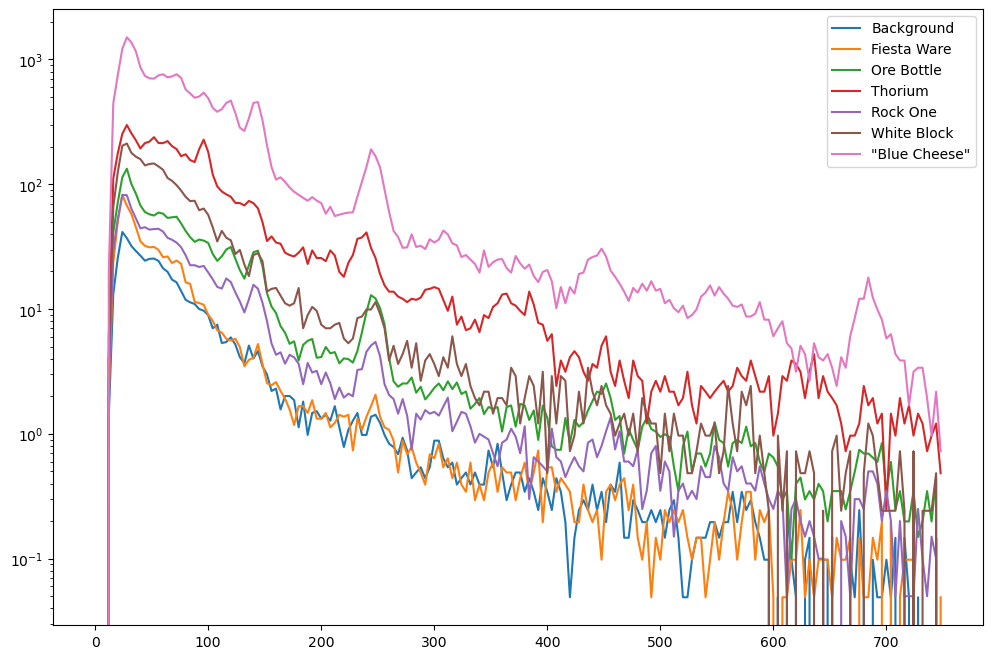

In [99]:
fig30, ax30 = plt.subplots(figsize=(12,8))
graph_smooth(fig30, ax30, bg_spectrum, 'Background')
graph_smooth(fig30, ax30, FW_AL_spectrum, 'Fiesta Ware')
graph_smooth(fig30, ax30, OB_AL_spectrum, 'Ore Bottle')
graph_smooth(fig30, ax30, TH_AL_spectrum, 'Thorium')
graph_smooth(fig30, ax30, R1_AL_spectrum, 'Rock One')
graph_smooth(fig30, ax30, WB_AL_spectrum, 'White Block')
graph_smooth(fig30, ax30, BC_AL_spectrum, '"Blue Cheese"')
ax30.legend()

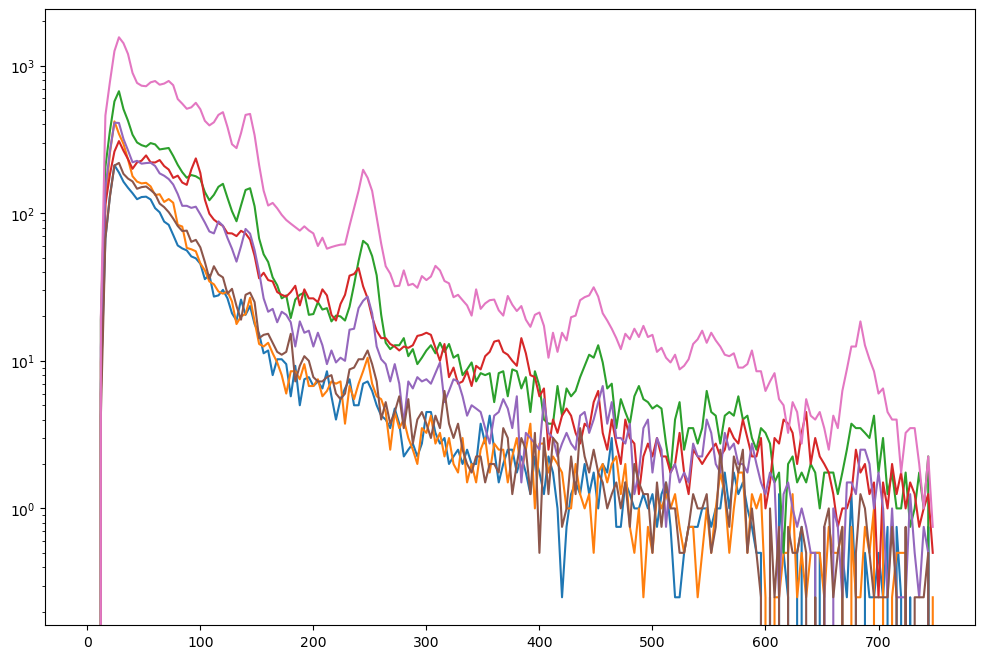

In [100]:
fig31, ax31 = plt.subplots(figsize=(12,8))
graph_smooth_unpro(fig31, ax31, bg_spectrum, 'Background')
graph_smooth_unpro(fig31, ax31, FW_AL_spectrum, 'Fiesta Ware')
graph_smooth_unpro(fig31, ax31, OB_AL_spectrum, 'Ore Bottle')
graph_smooth_unpro(fig31, ax31, TH_AL_spectrum, 'Thorium')
graph_smooth_unpro(fig31, ax31, R1_AL_spectrum, 'Rock One')
graph_smooth_unpro(fig31, ax31, WB_AL_spectrum, 'White Block')
graph_smooth_unpro(fig31, ax31, BC_AL_spectrum, '"Blue Cheese"')
ax26.legend()